<a href="https://colab.research.google.com/github/mohsin-tariq/BikeSharingCaseStudy/blob/main/credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem statement:-

### To predict fraudulent credit card transactions using machine learning models.

## Steps
1. Data visualization
2. Data modelling
3. Build model
4. Evaluate model

In [1]:
# This was used while running the model in Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing the libraries
import pandas as pd
import numpy as np
from pathlib import Path

# importing matplotlib
import matplotlib.pyplot as plt

# display plots in the notebook itself
%matplotlib inline

#import the necessary libraries
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from scipy.special import jv

In [3]:
pd.set_option('display.max_columns', 500)

# Exploratory data analysis

## Reading and understanding the data

In [4]:
# Reading the dataset
file_path = '/content/drive/MyDrive/creditcard.csv'

df = pd.read_csv(file_path)
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   

   Amount  Class  
0  149.62      0  
1    2.69      0  
2  378.66      0  
3  123.50      0  
4   69.99      0

In [5]:
df.shape

(284807, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

                V10           V11           V12           V13           V14  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   2.239053e-15  1.673327e-15 -1.247012e-15  8.190001e-16  1.207294e-15   
std    1.088850e+00  1.020713e+00  9.992014e-01  9.952742e-01  9.585956e-01   
min   -2.458826e+01 -4.797473e+00 -1.868371e+01 -5.791881e+00 -1.921433e+01   
25%   -5.354257e-01 -7.624942e-01 -4.055715e-01 -6.485393e-01 -4.255740e-01   
50%   -9.291738e-02 -3.275735e-02  1.400326e-01 -1.356806e-02  5.060132e-02   
75%    4.539234e-01  7.395934e-01  6.182380e-01  6.625050e-01  4.931498e-01   
max    2.374514e+01  1.201891e+01  7.848392e+00  7.126883e+00  1.052677e+01   

                V15           V16           V17           V18           V19  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   4.887456e-15  1.437716e-15 -3.772171e-16  9.564149e-16  1.039917e-15   
std    9.153160e-01  8.762529e-01  8.493371e-01  8.381762e-01  8.140405e-01   
min   -4.498945e+00 -1.412985e+01 -2.516280e+01 -9.498746e+00 -7.213527e+00   
25%   -5.828843e-01 -4.680368e-01 -4.837483e-01 -4.988498e-01 -4.562989e-01   
50%    4.807155e-02  6.641332e-02 -6.567575e-02 -3.636312e-03  3.734823e-03   
75%    6.488208e-01  5.232963e-01  3.996750e-01  5.008067e-01  4.589494e-01   
max    8.877742e+00  1.731511e+01  9.253526e+00  5.041069e+00  5.591971e+00   

                V20           V21           V22           V23           V24  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   6.406204e-16  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    7.709250e-01  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min   -5.449772e+01 -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%   -2.117214e-01 -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%   -6.248109e-02 -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    1.330408e-01  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    3.942090e+01  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02

## Handle missing data

> Check missing data for each particular row and column if the frequency is too high, drop it



#### Handling missing data in columns

In [8]:
# Cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

null
Time     0.0
V16      0.0
Amount   0.0
V28      0.0
V27      0.0
V26      0.0
V25      0.0
V24      0.0
V23      0.0
V22      0.0
V21      0.0
V20      0.0
V19      0.0
V18      0.0
V17      0.0
V15      0.0
V1       0.0
V14      0.0
V13      0.0
V12      0.0
V11      0.0
V10      0.0
V9       0.0
V8       0.0
V7       0.0
V6       0.0
V5       0.0
V4       0.0
V3       0.0
V2       0.0
Class    0.0

No missing values in any of the columns. All looks good for columns

### Checking the distribution of the classes

In [9]:
classes = df['Class'].value_counts()
classes

Class
0    284315
1       492
Name: count, dtype: int64

In [10]:
normal_share = round((classes[0]/df['Class'].count()*100),2)
normal_share

99.83

In [11]:
fraud_share = round((classes[1]/df['Class'].count()*100),2)
fraud_share

0.17

We can see that there is only 0.17% frauds. We will take care of the class imbalance later.

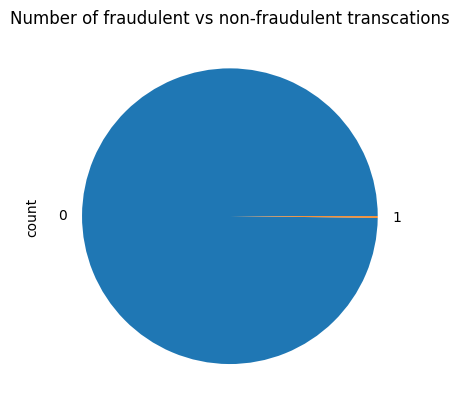

In [12]:
# Bar plot for the number of fraudulent vs non-fraudulent transcations
plt.title('Number of fraudulent vs non-fraudulent transcations')
df['Class'].value_counts().plot.pie()
plt.show()

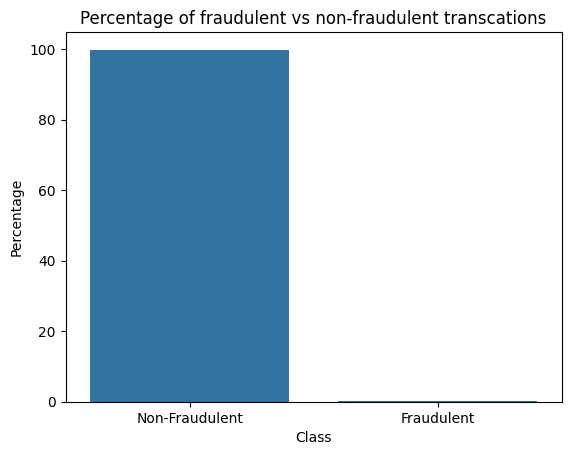

In [13]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]}
df_fraud_percentage = pd.DataFrame(fraud_percentage)
sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage)
plt.title('Percentage of fraudulent vs non-fraudulent transcations')
plt.show()

### Observe the distribution of classes with time

In [14]:
# Creating fraudulent dataframe
data_fraud = df[df['Class'] == 1]
# Creating non fraudulent dataframe
data_non_fraud = df[df['Class'] == 0]

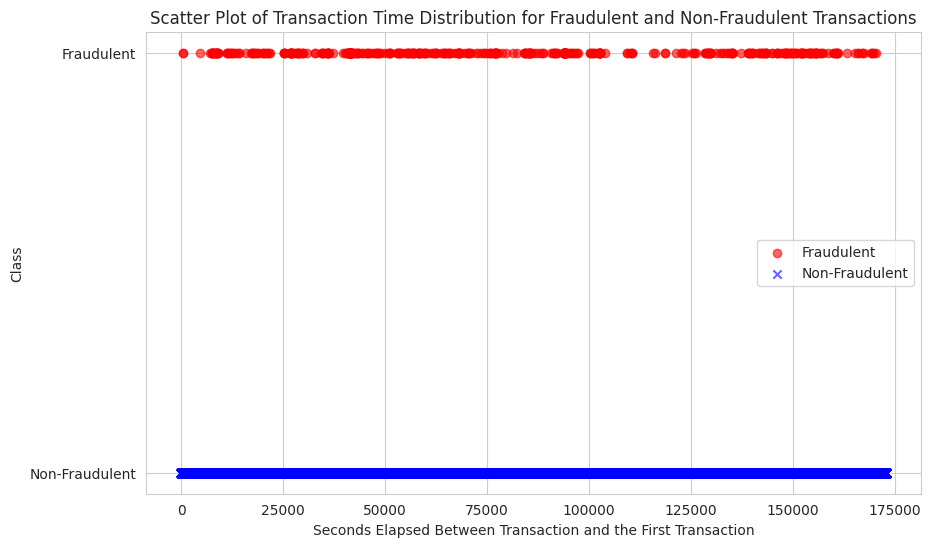

In [15]:
# Create a scatter plot to observe the distribution of classes with time
plt.figure(figsize=(10,6))  # Adjust figure size for better readability
sns.set_style("whitegrid")  # Optional: Set a grid style for better visuals

# Scatter plot for fraudulent transactions
plt.scatter(data_fraud['Time'], [1] * len(data_fraud), label='Fraudulent', color='red', alpha=0.6, marker='o')

# Scatter plot for non-fraudulent transactions
plt.scatter(data_non_fraud['Time'], [0] * len(data_non_fraud), label='Non-Fraudulent', color='blue', alpha=0.6, marker='x')

# Set plot labels and title
plt.xlabel('Seconds Elapsed Between Transaction and the First Transaction')
plt.ylabel('Class')
plt.title('Scatter Plot of Transaction Time Distribution for Fraudulent and Non-Fraudulent Transactions')

# Add legend and adjust y-axis
plt.legend()
plt.yticks([0, 1], ['Non-Fraudulent', 'Fraudulent'])  # Replace numerical labels with class labels

# Show plot
plt.show()

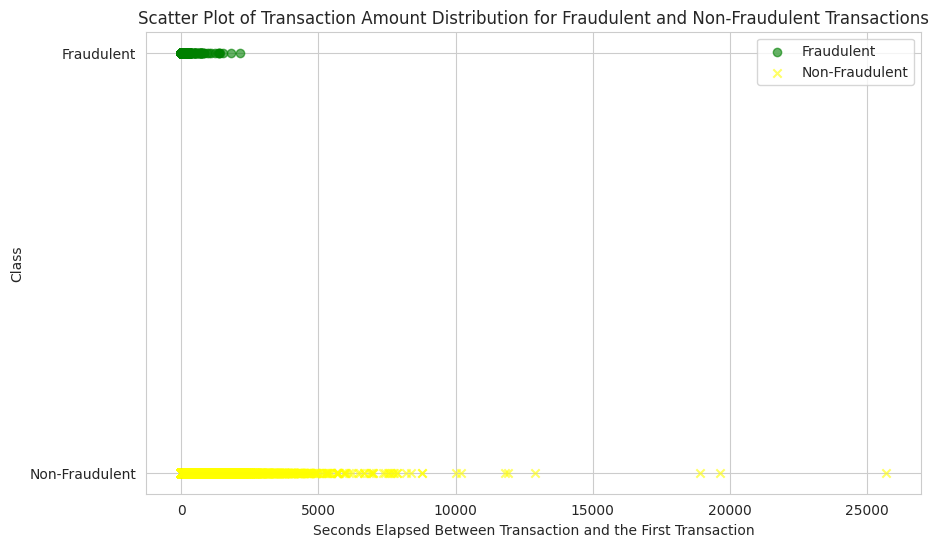

In [16]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.figure(figsize=(10,6))  # Adjust figure size for better readability
sns.set_style("whitegrid")  # Optional: Set a grid style for better visuals

# Scatter plot for fraudulent transactions
plt.scatter(data_fraud['Amount'], [1] * len(data_fraud), label='Fraudulent', color='green', alpha=0.6, marker='o')

# Scatter plot for non-fraudulent transactions
plt.scatter(data_non_fraud['Amount'], [0] * len(data_non_fraud), label='Non-Fraudulent', color='yellow', alpha=0.6, marker='x')

# Set plot labels and title
plt.xlabel('Seconds Elapsed Between Transaction and the First Transaction')
plt.ylabel('Class')
plt.title('Scatter Plot of Transaction Amount Distribution for Fraudulent and Non-Fraudulent Transactions')

# Add legend and adjust y-axis
plt.legend()
plt.yticks([0, 1], ['Non-Fraudulent', 'Fraudulent'])  # Replace numerical labels with class labels

# Show plot
plt.show()

##### Analysis
We do not see any specific pattern for the fraudulent and non-fraudulent transctions with respect to Time.
Hence, we can drop the `Time` column.

In [17]:
# Drop unnecessary columns
df.drop('Time', axis=1, inplace=True)

### Observe the distribution of classes with amount

##### Analysis
We can see that the fraudulent transctions are mostly densed in the lower range of amount, whereas the non-fraudulent transctions are spreaded throughout low to high range of amount.

### Splitting the data into train & test data

In [18]:
# Import library
from sklearn.model_selection import train_test_split

In [19]:
# Putting feature variables into X
X = df.drop(['Class'], axis=1)

In [20]:
# Putting target variable to y
y = df['Class']

In [21]:
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [22]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
396
96


### Plotting the distribution of a variable

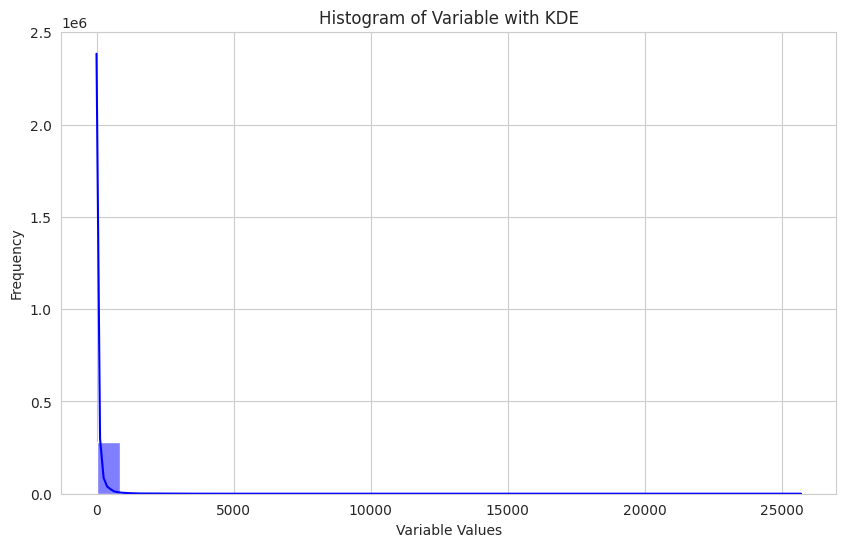

In [23]:
# plot the histogram of a variable from the dataset to see the skewness
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the histogram of a variable (replace 'variable_name' with the actual column name)
plt.figure(figsize=(10,6))
sns.histplot(df['Amount'], kde=True, color='blue', bins=30)

# Add labels and title
plt.xlabel('Variable Values')
plt.ylabel('Frequency')
plt.title('Histogram of Variable with KDE')

# Show the plot
plt.show()

## Feature Scaling
Scale `Amount` column as all other columns are already scaled by the PCA transformation.

In [24]:
# Standardization method
from sklearn.preprocessing import StandardScaler

In [25]:
# Instantiate the Scaler
scaler = StandardScaler()

In [26]:
# Fit the data into scaler and transform
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])

In [27]:
X_train.head()

V1        V2        V3        V4        V5        V6        V7  \
201788  2.023734 -0.429219 -0.691061 -0.201461 -0.162486  0.283718 -0.674694   
179369 -0.145286  0.736735  0.543226  0.892662  0.350846  0.089253  0.626708   
73138  -3.015846 -1.920606  1.229574  0.721577  1.089918 -0.195727 -0.462586   
208679  1.851980 -1.007445 -1.499762 -0.220770 -0.568376 -1.232633  0.248573   
206534  2.237844 -0.551513 -1.426515 -0.924369 -0.401734 -1.438232 -0.119942   

              V8        V9       V10       V11       V12       V13       V14  \
201788  0.192230  1.124319 -0.037763  0.308648  0.875063 -0.009562  0.116038   
179369 -0.049137 -0.732566  0.297692  0.519027  0.041275 -0.690783  0.647121   
73138   0.919341 -0.612193 -0.966197  1.106534  1.026421 -0.474229  0.641488   
208679 -0.539483 -0.813368  0.785431 -0.784316  0.673626  1.428269  0.043937   
206534 -0.449263 -0.717258  0.851668 -0.497634 -0.445482  0.324575  0.125543   

             V15       V16       V17       V18       V19       V20       V21  \
201788  0.086537  0.628337 -0.997868  0.482547  0.576077 -0.171390 -0.195207   
179369  0.526333 -1.098558  0.511739  0.243984  3.349611  0.206709 -0.124288   
73138  -0.430684 -0.631257  0.634633 -0.718062 -0.039929  0.842838  0.274911   
208679 -0.309507 -1.805728 -0.012118  0.377096 -0.658353 -0.196551 -0.406722   
206534  0.266588  0.802640  0.225312 -1.865494  0.621879 -0.045417  0.050447   

             V22       V23       V24       V25       V26       V27       V28  \
201788 -0.477813  0.340513  0.059174 -0.431015 -0.297028 -0.000063 -0.046947   
179369 -0.263560 -0.110568 -0.434224 -0.509076  0.719784 -0.006357  0.146053   
73138  -0.319550  0.212891 -0.268792  0.241190  0.318445 -0.100726 -0.365257   
208679 -0.899081  0.137370  0.075894 -0.244027  0.455618 -0.094066 -0.031488   
206534  0.125601  0.215531 -0.080485 -0.063975 -0.307176 -0.042838 -0.063872   

          Amount  
201788 -0.345273  
179369 -0.206439  
73138   0.358043  
208679  0.362400  
206534 -0.316109

##### Scaling the test set
We don't fit scaler on the test set. We only transform the test set.

In [28]:
# Transform the test set
X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test.head()

V1        V2        V3        V4        V5        V6        V7  \
49089   1.229452 -0.235478 -0.627166  0.419877  1.797014  4.069574 -0.896223   
154704  2.016893 -0.088751 -2.989257 -0.142575  2.675427  3.332289 -0.652336   
67247   0.535093 -1.469185  0.868279  0.385462 -1.439135  0.368118 -0.499370   
251657  2.128486 -0.117215 -1.513910  0.166456  0.359070 -0.540072  0.116023   
201903  0.558593  1.587908 -2.368767  5.124413  2.171788 -0.500419  1.059829   

              V8        V9       V10       V11       V12       V13       V14  \
49089   1.036103  0.745991 -0.147304 -0.850459  0.397845 -0.259849 -0.277065   
154704  0.752811  1.962566 -1.025024  1.126976 -2.418093  1.250341 -0.056209   
67247   0.303698  1.042073 -0.437209  1.145725  0.907573 -1.095634 -0.055080   
251657 -0.216140  0.680314  0.079977 -1.705327 -0.127579 -0.207945  0.307878   
201903 -0.254233 -1.959060  0.948915 -0.288169 -1.007647  0.470316 -2.771902   

             V15       V16       V17       V18       V19       V20       V21  \
49089  -0.766810 -0.200946 -0.338122  0.006032  0.477431 -0.057922 -0.170060   
154704 -0.736695  0.014783  1.890249  0.333755 -0.450398 -0.147619 -0.184153   
67247  -0.621880 -0.191066  0.311988 -0.478635  0.231159  0.437685  0.028010   
251657  0.213491  0.163032 -0.587029 -0.561292  0.472667 -0.227278 -0.357993   
201903  0.221958  0.354333  2.603189  1.092576  0.668084  0.249457 -0.035049   

             V22       V23       V24       V25       V26       V27       V28  \
49089  -0.288750 -0.130270  1.025935  0.847990 -0.271476  0.060052  0.018104   
154704 -0.089661  0.087188  0.570679  0.101899  0.620842 -0.048958 -0.042831   
67247  -0.384708 -0.128376  0.286638 -0.136700  0.913904 -0.083364  0.052485   
251657 -0.905085  0.223474 -1.075605 -0.188519  0.267672 -0.071733 -0.072238   
201903  0.271455  0.381606  0.332001 -0.334757  0.448890  0.168585  0.004955   

          Amount  
49089  -0.340485  
154704 -0.320859  
67247   0.853442  
251657 -0.344410  
201903 -0.229480

In [29]:
# Listing the columns
cols = X_train.columns
cols

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

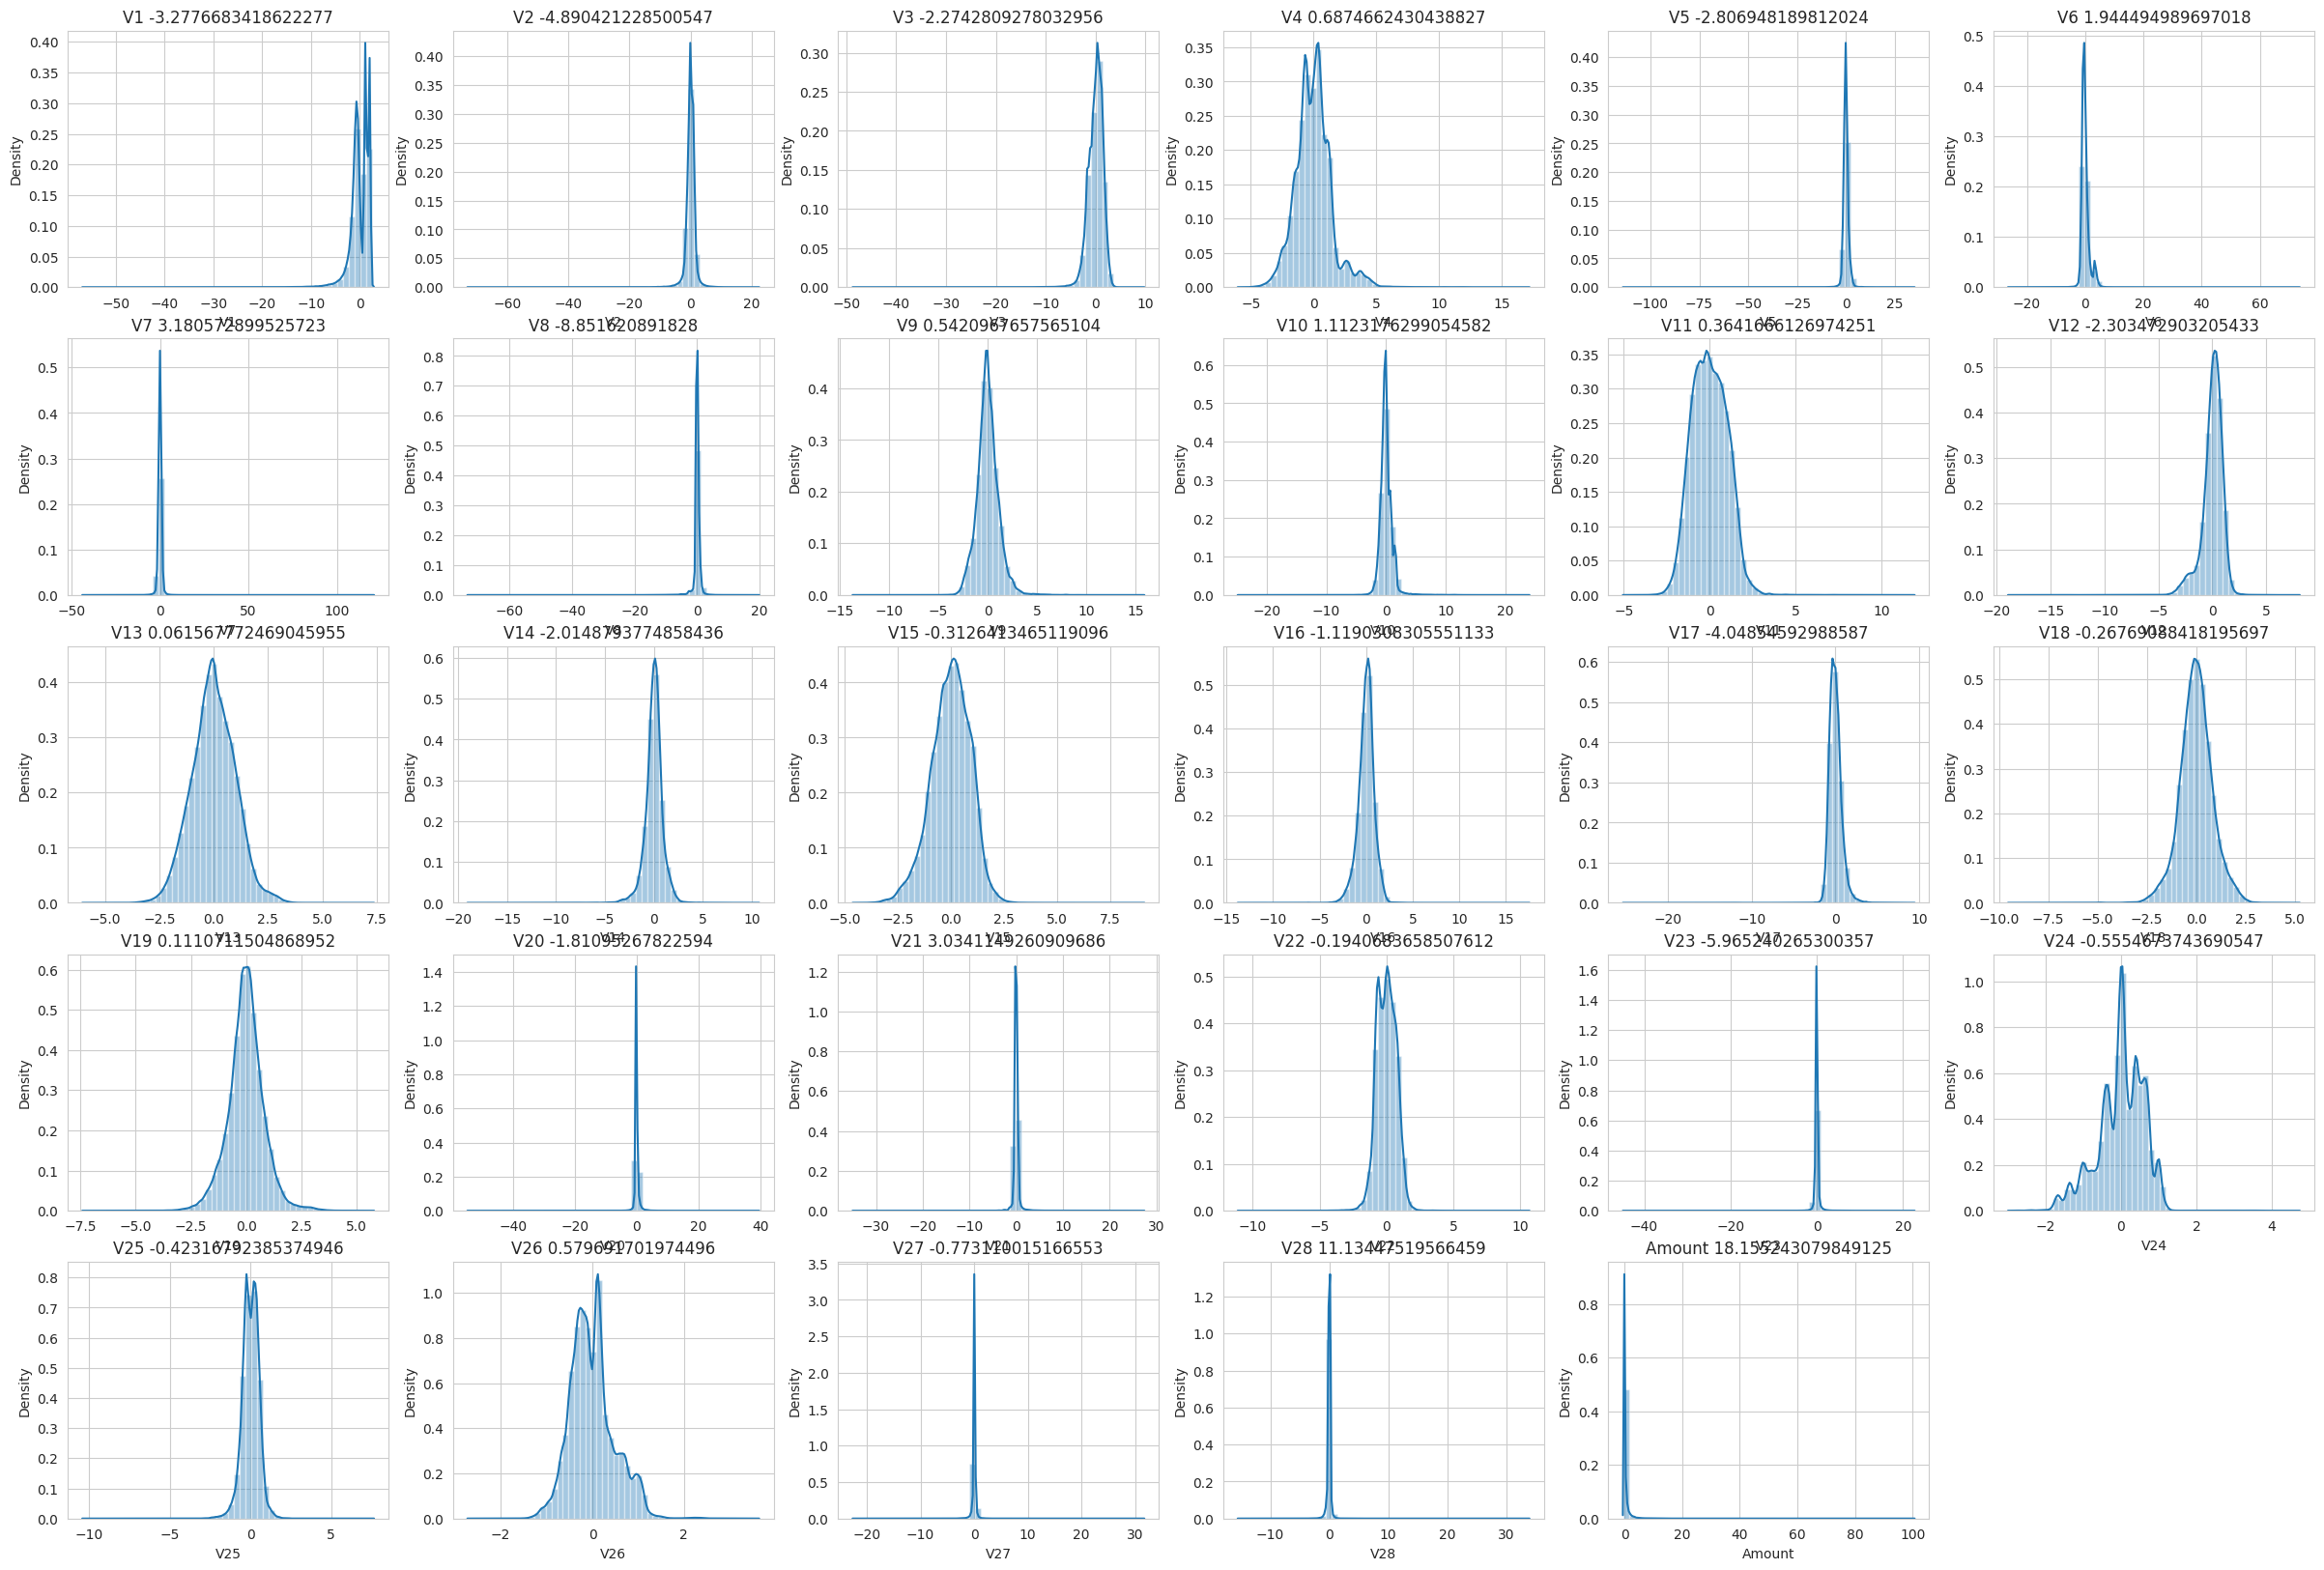

In [30]:
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(30,20))
for col in cols :
    k=k+1
    plt.subplot(5, 6,k)
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

We see that there are many variables, which are heavily skewed. We will mitigate the skewness only for those variables for bringing them into normal distribution.

### Mitigate skweness with PowerTransformer

In [31]:
# Importing PowerTransformer
from sklearn.preprocessing import PowerTransformer
# Instantiate the powertransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
# Fit and transform the PT on training data
X_train[cols] = pt.fit_transform(X_train)

In [32]:
# Transform the test set
X_test[cols] = pt.transform(X_test)

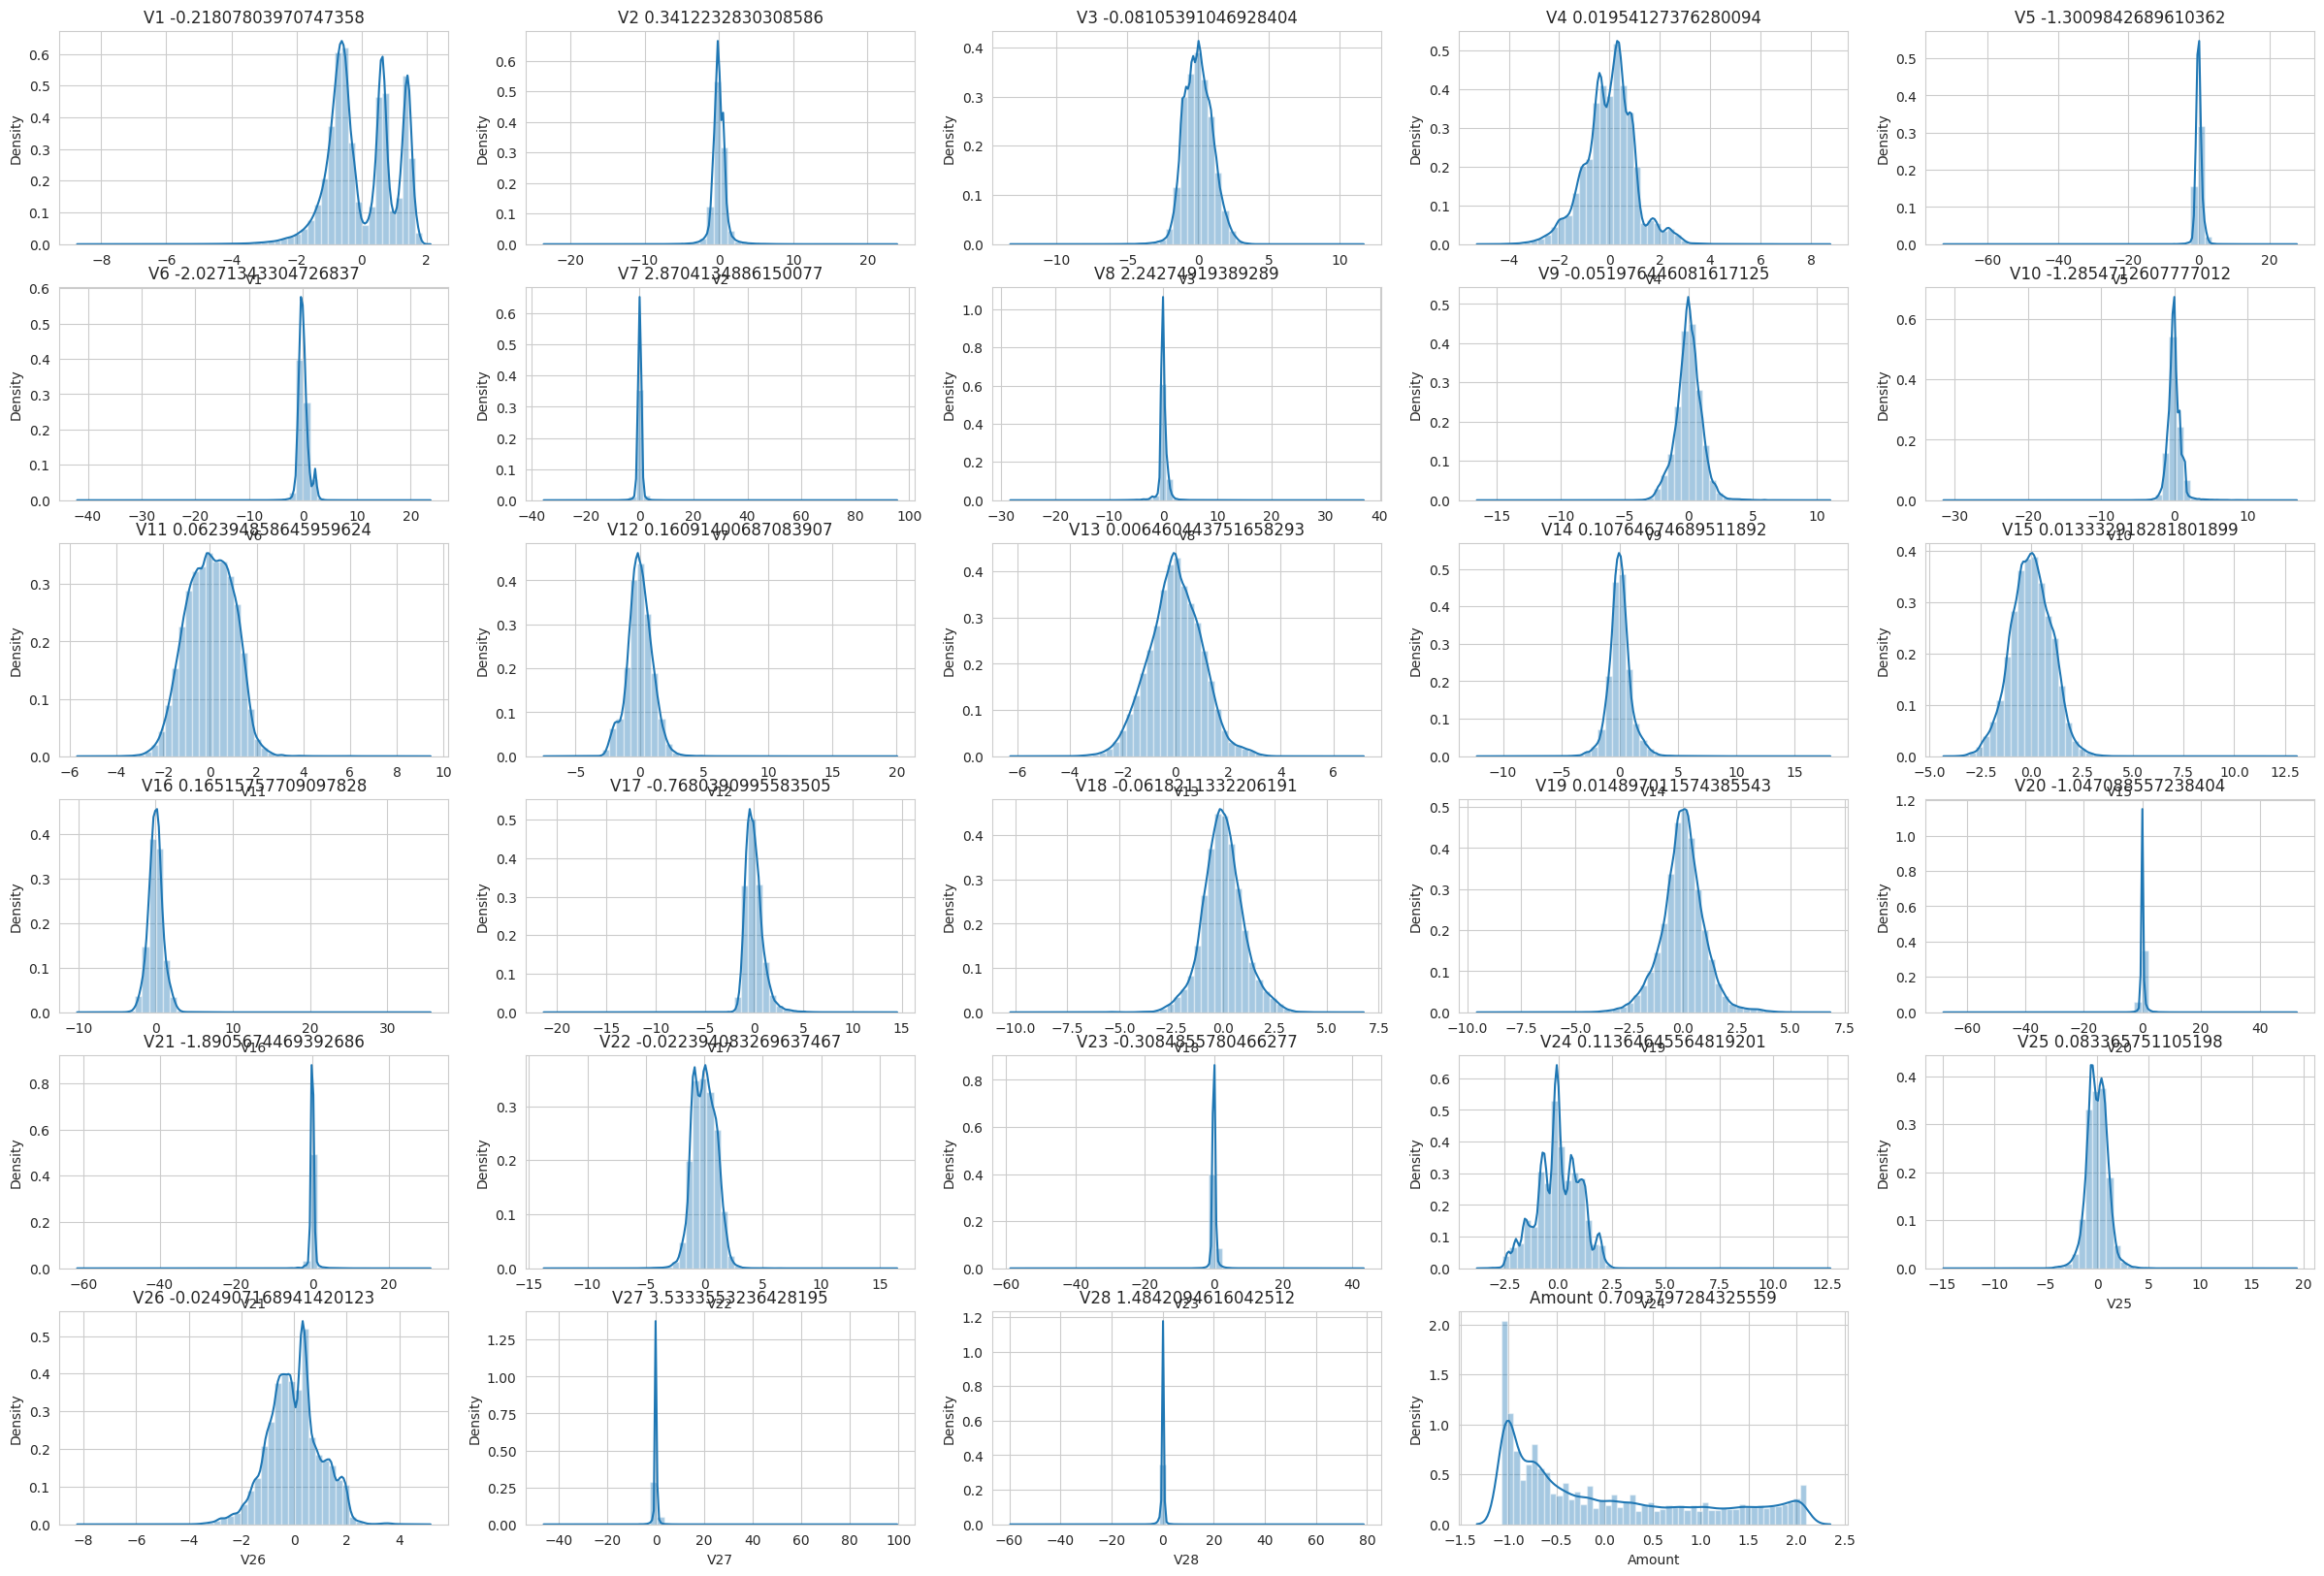

In [33]:
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(30,20))
for col in cols :
    k=k+1
    plt.subplot(6, 5,k)
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

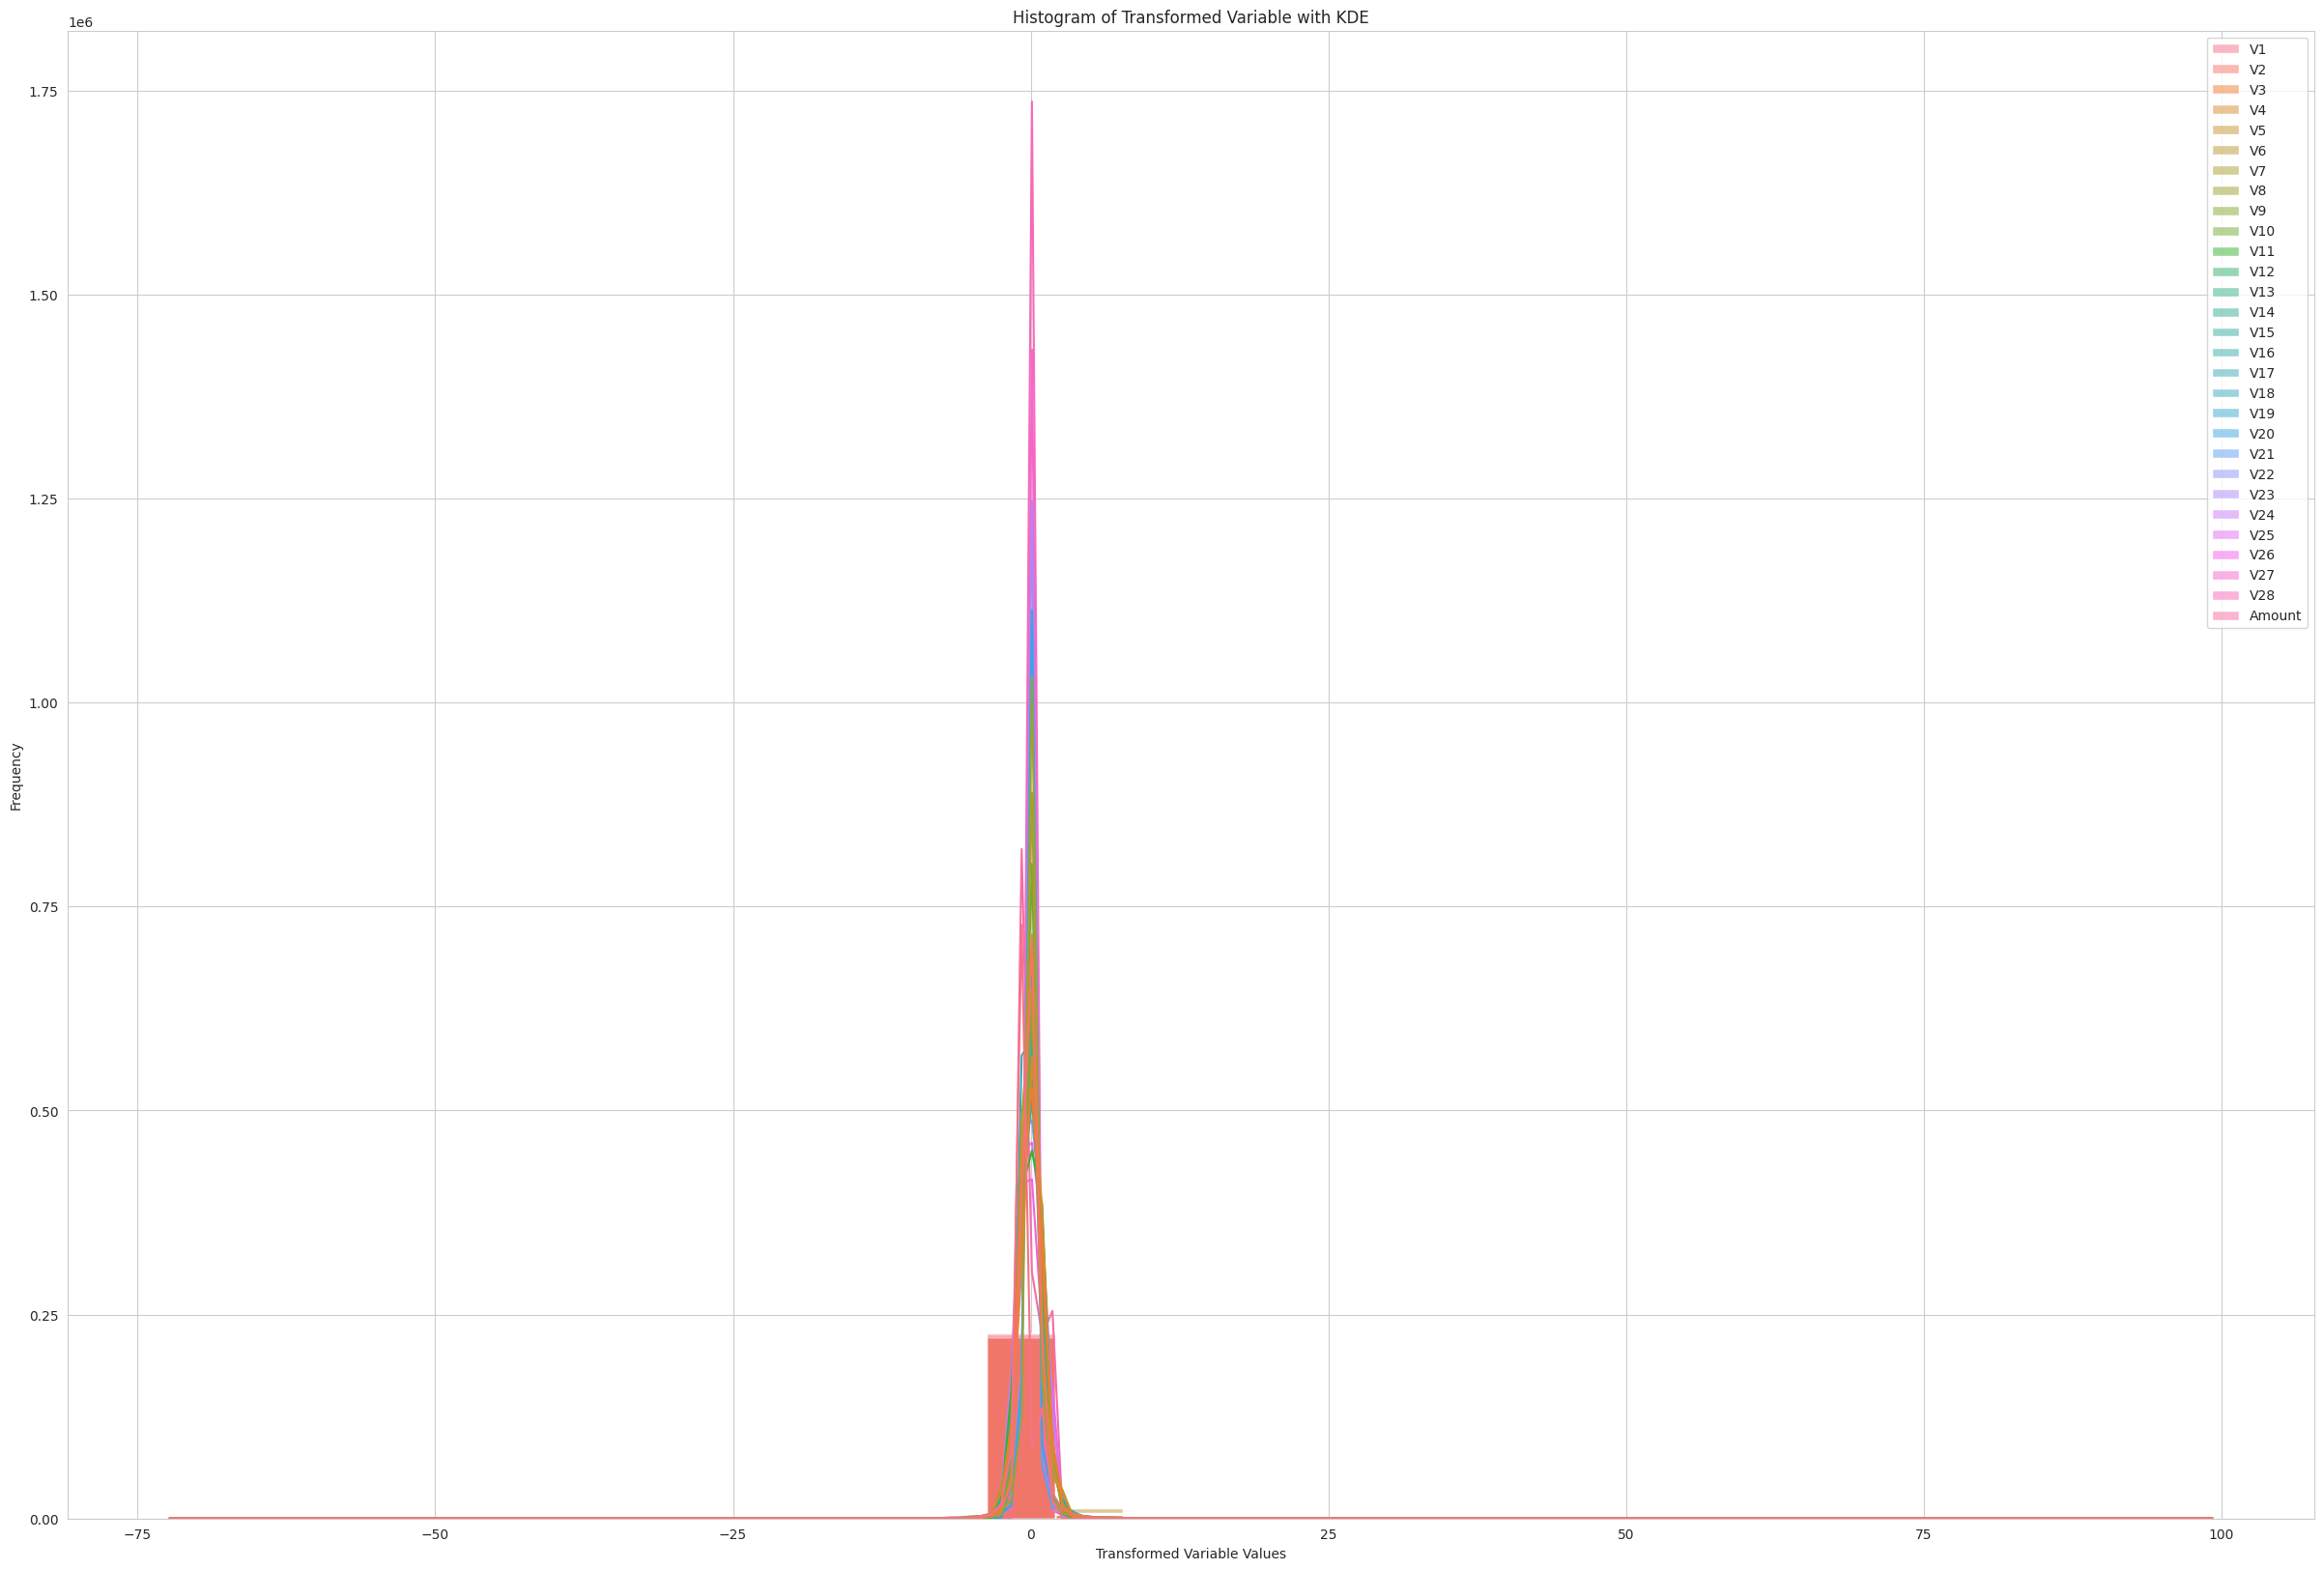

In [34]:
# plot the histogram of a variable from the dataset again to see the result

# Choose a specific variable (replace 'variable_name' with the actual column name)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(30,20))

# Plot the histogram for the transformed variable (e.g., from X_train)
sns.histplot(X_train[cols], kde=True, color='blue', bins=30)  # Replace 0 with the column index you want to plot

# Add labels and title
plt.xlabel('Transformed Variable Values')
plt.ylabel('Frequency')
plt.title('Histogram of Transformed Variable with KDE')

# Show the plot
plt.show()

Now we can see that all the variables are normally distributed after the transformation.

# Model building

Given the significant imbalance in the data, where only 0.17% of transactions are fraudulent, accuracy is not a reliable metric for evaluating the model. A model predicting only the majority class (e.g., always predicting "non-fraudulent") could still achieve over 99% accuracy, which is misleading.

Instead, the ROC-AUC score serves as a more appropriate metric for fair evaluation. The ROC curve evaluates the model's performance across all classification thresholds, allowing us to assess its ability to distinguish between classes. The default threshold of 0.5 is not always optimal for determining the best classification label for a test point. By analyzing the ROC curve, we can identify the threshold where the true positive rate (TPR) is maximized while the false positive rate (FPR) remains low, minimizing misclassifications.

Once the optimal threshold is established, the F1 score can be calculated to evaluate the classifier's precision and recall at this threshold, providing a balanced measure of its performance.


## KNN regression

In [70]:
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report


In [71]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold, GridSearchCV


In [38]:


# Creating KFold object with 3 splits
folds = KFold(n_splits=3, shuffle=True, random_state=4)

# Specify params for KNN Regression (e.g., number of neighbors and weight types)
params = {"n_neighbors": [3, 5, 7, 9, 11], "weights": ['uniform', 'distance']}

# Specifying score as 'neg_mean_squared_error' for regression tasks (or you can use 'r2')
model_cv = GridSearchCV(estimator=KNeighborsRegressor(),
                        param_grid=params,
                        scoring='neg_mean_squared_error',  # You can also use 'r2' for R² score
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

# Fit the model
model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=4, shuffle=True),
             estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [39]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.088674      0.014661        81.271045        0.837694   
1       0.069846      0.003174        82.608442        0.795097   
2       0.065761      0.001347        81.753598        1.038427   
3       0.070814      0.007357        82.200813        0.016978   
4       0.079456      0.019526        82.322707        0.052709   
5       0.099840      0.006481        81.845004        0.779991   
6       0.086281      0.015773        79.911200        1.097700   
7       0.077860      0.016232        77.576393        1.453911   
8       0.075631      0.012343        76.333072        0.837602   
9       0.066520      0.003690        76.624016        0.940263   

   param_n_neighbors param_weights  \
0                  3       uniform   
1                  3      distance   
2                  5       uniform   
3                  5      distance   
4                  7       uniform   
5                  7      distance   
6                  9       uniform   
7                  9      distance   
8                 11       uniform   
9                 11      distance   

                                       params  split0_test_score  \
0    {'n_neighbors': 3, 'weights': 'uniform'}          -0.000522   
1   {'n_neighbors': 3, 'weights': 'distance'}          -0.000534   
2    {'n_neighbors': 5, 'weights': 'uniform'}          -0.000507   
3   {'n_neighbors': 5, 'weights': 'distance'}          -0.000500   
4    {'n_neighbors': 7, 'weights': 'uniform'}          -0.000519   
5   {'n_neighbors': 7, 'weights': 'distance'}          -0.000498   
6    {'n_neighbors': 9, 'weights': 'uniform'}          -0.000519   
7   {'n_neighbors': 9, 'weights': 'distance'}          -0.000491   
8   {'n_neighbors': 11, 'weights': 'uniform'}          -0.000523   
9  {'n_neighbors': 11, 'weights': 'distance'}          -0.000488   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0          -0.000452          -0.000459        -0.000478        0.000032   
1          -0.000444          -0.000431        -0.000470        0.000046   
2          -0.000437          -0.000475        -0.000473        0.000028   
3          -0.000425          -0.000436        -0.000454        0.000033   
4          -0.000448          -0.000470        -0.000479        0.000030   
5          -0.000424          -0.000429        -0.000450        0.000034   
6          -0.000448          -0.000479        -0.000482        0.000029   
7          -0.000417          -0.000431        -0.000446        0.000032   
8          -0.000449          -0.000470        -0.000480        0.000031   
9          -0.000416          -0.000420        -0.000441        0.000033   

   rank_test_score  split0_train_score  split1_train_score  \
0                7       -2.143279e-04       -2.157895e-04   
1                5       -1.075967e-18       -4.180944e-18   
2                6       -2.952020e-04       -2.936200e-04   
3                4       -4.242776e-18       -8.273911e-18   
4                8       -3.446236e-04       -3.512047e-04   
5                3       -1.025796e-17       -1.410177e-17   
6               10       -3.693235e-04       -3.810249e-04   
7                2       -1.547774e-17       -1.998823e-17   
8                9       -3.857032e-04       -4.053965e-04   
9                1       -2.058526e-17       -2.565557e-17   

   split2_train_score  mean_train_score  std_train_score  
0       -2.582159e-04     -2.294444e-04     2.035324e-05  
1       -1.049268e-17     -5.249865e-18     3.917957e-18  
2       -3.349638e-04     -3.079286e-04     1.912769e-05  
3       -1.298257e-17     -8.499753e-18     3.571579e-18  
4       -3.739107e-04     -3.565797e-04     1.254598e-05  
5       -1.617455e-17     -1.351143e-17     2.451242e-18  
6       -3.996373e-04     -3.833286e-04     1.248228e-05  
7       -2.019092e-17     -1.855230e-17     2.175617e-18  
8       -4.183457e-04     -4.031485e-04     1.

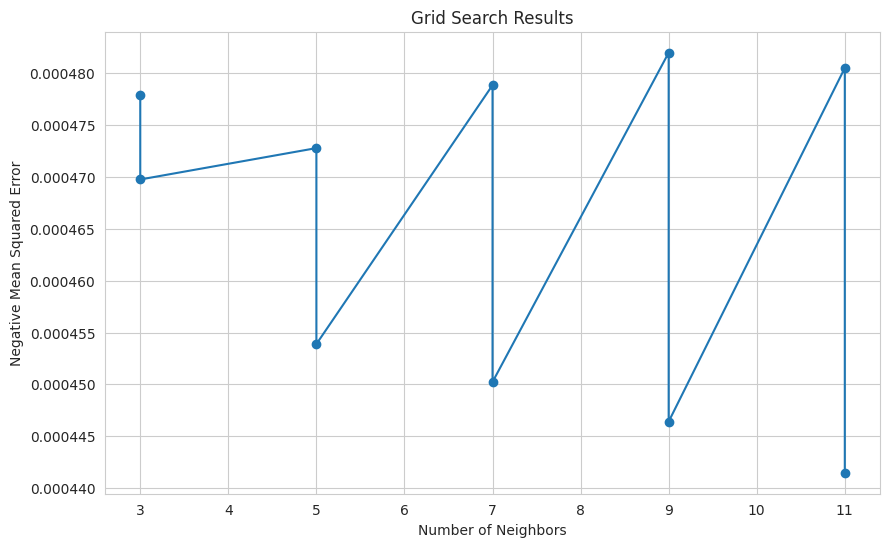

In [45]:
import matplotlib.pyplot as plt
results = pd.DataFrame(model_cv.cv_results_)
plt.figure(figsize=(10, 6))
plt.plot(results['param_n_neighbors'], -results['mean_test_score'], marker='o')
plt.xlabel('Number of Neighbors')
plt.ylabel('Negative Mean Squared Error')
plt.title('Grid Search Results')
plt.show()

In [46]:
# Best score with best C
# Display the best parameters
print("Best Parameters:", model_cv.best_params_)

# Display the best score (negative MSE, as per scoring metric used)
print("Best Score (neg MSE):", model_cv.best_score_)

# Convert the negative MSE to positive for interpretability
best_score_mse = -model_cv.best_score_
print("Best Score (MSE):", best_score_mse)

Best Parameters: {'n_neighbors': 11, 'weights': 'distance'}
Best Score (neg MSE): -0.00044148364692252244
Best Score (MSE): 0.00044148364692252244


## KNN regression with optimal C

In [47]:
# Instantiate the model with the best n_neighbors (e.g., n_neighbors=5)
knn_imb = KNeighborsRegressor(n_neighbors=5, weights='uniform')

In [48]:
# Fit the model on the train set
knn_imb_model = knn_imb.fit(X_train, y_train)

##### Prediction on the train set

In [49]:
# Predictions on the train set
y_train_pred = knn_imb_model.predict(X_train)

In [50]:
# Evaluate the model with regression metrics
mse = metrics.mean_squared_error(y_train, y_train_pred)
r2 = metrics.r2_score(y_train, y_train_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 0.0002859838925585377
R² Score: 0.8351680636498332


In [52]:
# Confusion matrix
y_train_pred_class = [1 if pred >= 0.5 else 0 for pred in y_train_pred]

# Assuming binary classification for demonstration
confusion = confusion_matrix(y_train, y_train_pred_class)
print(confusion)


[[227431     18]
 [    78    318]]


In [53]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [55]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred_class))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred_class))

Accuracy:- 0.9995786609317738
Sensitivity:- 0.803030303030303
Specificity:- 0.9999208613799138
F1-Score:- 0.8688524590163934


In [57]:
# classification_report
print(classification_report(y_train, y_train_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.95      0.80      0.87       396

    accuracy                           1.00    227845
   macro avg       0.97      0.90      0.93    227845
weighted avg       1.00      1.00      1.00    227845



##### ROC on the train set

In [72]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [66]:
# # Predicted probability
# y_train_pred_proba = knn_imb.predict_proba(X_train)[:,1]


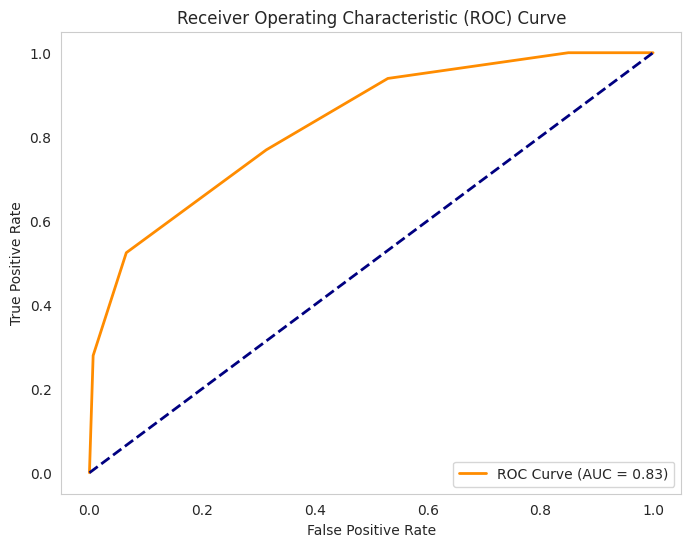

In [81]:
# Generate a synthetic regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# Binarize the target for ROC curve simulation
threshold = y.mean()  # Example threshold
y_binary = (y > threshold).astype(int)  # Convert to binary: 1 if above mean, else 0

# Split dataset
X_train, X_test_d, y_train, y_test_binary = train_test_split(X, y_binary, test_size=0.3, random_state=42)

# Train the KNN Regressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Get predicted regression outputs
y_pred = knn.predict(X_test_d)

# Calculate ROC curve using regression predictions as scores
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

We can see that we have  ROC on the test set 0.83

***Model summary***

- Train set
Accuracy:- 0.9995786609317738
Sensitivity:- 0.803030303030303
Specificity:- 0.9999208613799138
F1-Score:- 0.8688524590163934
  

## Logistic regression


In [69]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression


In [119]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# Fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [120]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_C  \
0       0.544429      0.049027         0.031314        0.005327     0.01   
1       0.616746      0.090065         0.033053        0.009911     0.10   
2       0.786156      0.179872         0.028058        0.000958     1.00   
3       0.547977      0.100259         0.022674        0.003929    10.00   
4       0.427367      0.023749         0.020373        0.000941   100.00   
5       0.432964      0.033338         0.021059        0.002730  1000.00   

        params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.01}           0.990164           0.986901           0.961656   
1   {'C': 0.1}           0.988704           0.985957           0.946637   
2     {'C': 1}           0.988224           0.985444           0.938839   
3    {'C': 10}           0.988233           0.985055           0.937772   
4   {'C': 100}           0.988083           0.985069           0.937615   
5  {'C': 1000}           0.988084           0.985070           0.937597   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.981826           0.994908         0.983091        0.011535   
1           0.980769           0.993755         0.979164        0.016797   
2           0.975737           0.992757         0.976200        0.019495   
3           0.975085           0.992734         0.975776        0.019868   
4           0.975659           0.992729         0.975831        0.019907   
5           0.975667           0.992729         0.975829        0.019914   

   rank_test_score  split0_train_score  split1_train_score  \
0                1            0.982898            0.983474   
1                2            0.979734            0.981928   
2                3            0.975446            0.981099   
3                6            0.975300            0.980501   
4                4            0.975993            0.980509   
5                5            0.975990            0.980510   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.988951            0.985696            0.982194   
1            0.986449            0.983659            0.979819   
2            0.984576            0.978482            0.978537   
3            0.984220            0.977795            0.978492   
4            0.984162            0.978321            0.978486   
5            0.984155            0.978329            0.978486   

   mean_train_score  std_train_score  
0          0.984643         0.002453  
1          0.982318         0.002527  
2          0.979628         0.003054  
3          0.979261         0.002985  
4          0.979494         0.002737  
5          0.979494         0.002736

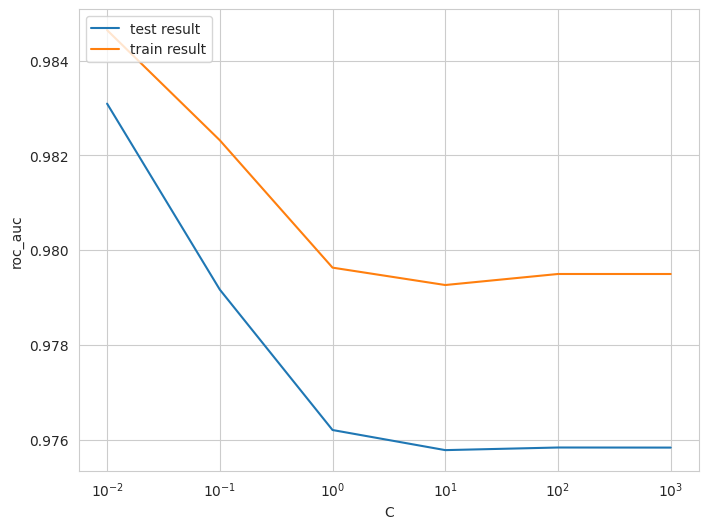

In [121]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [122]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9830907583052021 at C = 0.01


In [123]:
# Instantiate the model with best C
logistic_imb = LogisticRegression(C=0.01)

In [124]:
# Fit the model on the train set
logistic_imb_model = logistic_imb.fit(X_train, y_train)

In [125]:
y_train_pred = logistic_imb_model.predict(X_train)


In [127]:
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print('Confusion Matrix \n',confusion)

Confusion Matrix 
 [[227426     23]
 [   146    250]]


In [136]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Accuracy:",metrics.accuracy_score(y_train, y_train_pred))
print("Sensitivity:",TP / float(TP+FN))
print("Specificity:", TN / float(TN+FP))
print("F1-Score:", f1_score(y_train, y_train_pred))

Accuracy: 0.9992582676819768
Sensitivity: 0.6313131313131313
Specificity: 0.9998988784298898
F1-Score: 0.7473841554559043


In [130]:
print(classification_report(y_train, y_train_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.92      0.63      0.75       396

    accuracy                           1.00    227845
   macro avg       0.96      0.82      0.87    227845
weighted avg       1.00      1.00      1.00    227845



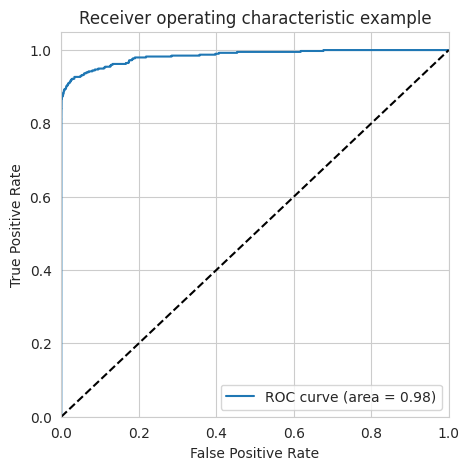

In [132]:
# Plt ROC
y_train_pred_proba = logistic_imb_model.predict_proba(X_train)[:,1]
draw_roc(y_train, y_train_pred_proba)

#### Prediction on the test set


In [133]:
y_test_pred = logistic_imb_model.predict(X_test)


In [134]:
confusionM = metrics.confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix \n',confusionM)

Confusion Matrix 
 [[56852    14]
 [   46    50]]


In [135]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))
print("Sensitivity:",TP / float(TP+FN))
print("Specificity:", TN / float(TN+FP))
print("F1-Score:", f1_score(y_test, y_test_pred))

Accuracy: 0.9989466661985184
Sensitivity: 0.6313131313131313
Specificity: 0.9998988784298898
F1-Score: 0.625


In [137]:
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.78      0.52      0.62        96

    accuracy                           1.00     56962
   macro avg       0.89      0.76      0.81     56962
weighted avg       1.00      1.00      1.00     56962



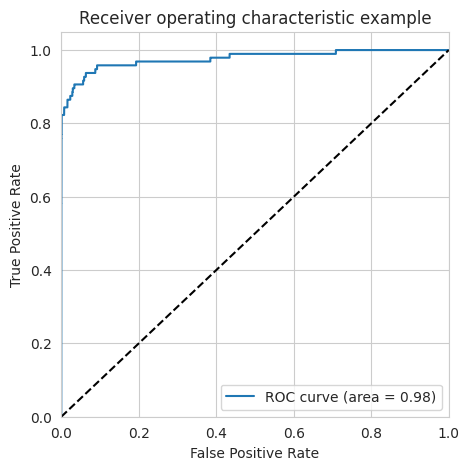

In [138]:
#ROC
y_test_pred_proba = logistic_imb_model.predict_proba(X_test)[:,1]
draw_roc(y_test, y_test_pred_proba)


We can see that we have very good ROC on the test set 0.98, which is almost close to 1.



## Support Vector Machine


In [80]:
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve


In [140]:
model = SVC()


In [141]:
model.fit(X_train,y_train)

SVC()

##### Training the model


In [142]:
model2 = SVC(probability=True, random_state=2)
svm = model2.fit(X_train, y_train)

In [143]:
y_pred_svm = model2.predict(X_test)

In [144]:
#scores
print("Accuracy SVM:",metrics.accuracy_score(y_test, y_pred_svm))
print("Precision SVM:",metrics.precision_score(y_test, y_pred_svm))
print("Recall SVM:",metrics.recall_score(y_test, y_pred_svm))
print("F1 Score SVM:",metrics.f1_score(y_test, y_pred_svm))

Accuracy SVM: 0.9992451107756047
Precision SVM: 0.8955223880597015
Recall SVM: 0.625
F1 Score SVM: 0.7361963190184049


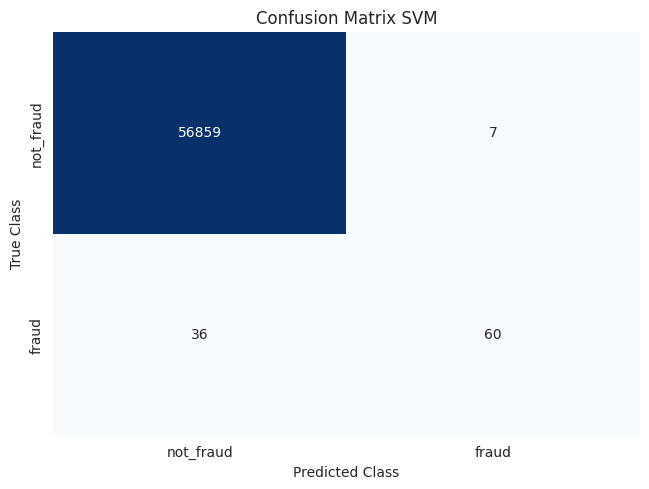

In [145]:
#CM matrix
matrix_svm = confusion_matrix(y_test, y_pred_svm)
cm_svm = pd.DataFrame(matrix_svm, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_svm, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix SVM"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [146]:
#AUC
y_pred_svm_proba = model2.predict_proba(X_test)[::,1]
fpr_svm, tpr_svm, _ = metrics.roc_curve(y_test,  y_pred_svm_proba)
auc_svm = metrics.roc_auc_score(y_test, y_pred_svm_proba)
print("AUC SVM :", auc_svm)

AUC SVM : 0.9212679442314682


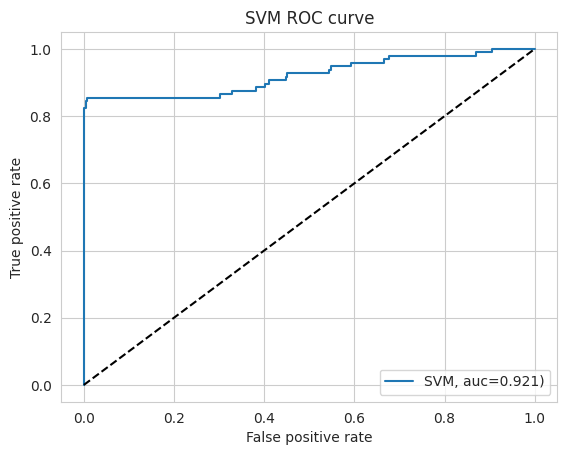

In [147]:
#ROC
plt.plot(fpr_svm,tpr_svm,label="SVM, auc={:.3f})".format(auc_svm))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('SVM ROC curve')
plt.legend(loc=4)
plt.show()

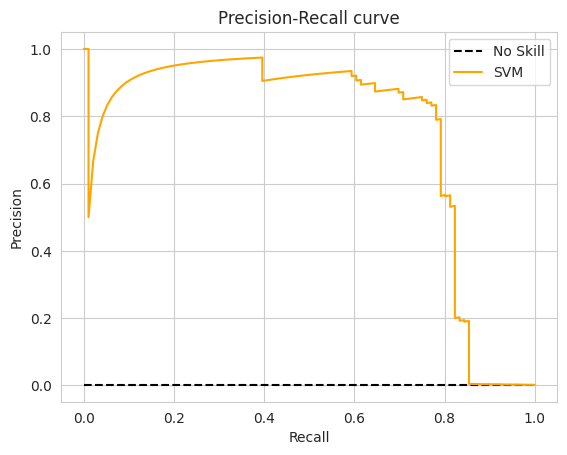

In [148]:
svm_precision, svm_recall, _ = precision_recall_curve(y_test, y_pred_svm_proba)
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', color='black', label='No Skill')
plt.plot(svm_recall, svm_precision, color='orange', label='SVM')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
plt.show()

## XGBoost

In [81]:
# Importing XGBoost
from xgboost import XGBClassifier

##### Tuning the hyperparameters

In [150]:
# hyperparameter tuning with XGBoost

# creating a KFold object
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [151]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       4.370553      1.423685         0.136713        0.005168   
1       5.328616      3.016791         0.131280        0.001397   
2       4.157042      1.512763         0.131745        0.000979   
3       4.396183      1.527003         0.140873        0.008074   
4       4.407469      1.544381         0.134098        0.003307   
5       4.251393      1.514622         0.137590        0.006686   

   param_learning_rate  param_subsample  \
0                  0.2              0.3   
1                  0.2              0.6   
2                  0.2              0.9   
3                  0.6              0.3   
4                  0.6              0.6   
5                  0.6              0.9   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}           0.971503   
1  {'learning_rate': 0.2, 'subsample': 0.6}           0.969237   
2  {'learning_rate': 0.2, 'subsample': 0.9}           0.977422   
3  {'learning_rate': 0.6, 'subsample': 0.3}           0.959016   
4  {'learning_rate': 0.6, 'subsample': 0.6}           0.969186   
5  {'learning_rate': 0.6, 'subsample': 0.9}           0.968313   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.972498           0.978483         0.974161        0.003082   
1           0.978238           0.973924         0.973800        0.003676   
2           0.973421           0.977898         0.976247        0.002008   
3           0.955137           0.967728         0.960627        0.005265   
4           0.962236           0.975353         0.968925        0.005358   
5           0.966660           0.977132         0.970701        0.004597   

   rank_test_score  split0_train_score  split1_train_score  \
0                2            0.999582            0.999761   
1                3            0.999976            0.999969   
2                1            0.999960            0.999977   
3                6            0.999993            0.999959   
4                5            1.000000            1.000000   
5                4            1.000000            1.000000   

   split2_train_score  mean_train_score  std_train_score  
0            0.999632          0.999658         0.000075  
1            0.999964          0.999970         0.000005  
2            0.999954          0.999964         0.000010  
3            0.999988          0.999980         0.000015  
4            1.000000          1.000000         0.000000  
5            1.000000          1.000000         0.000000

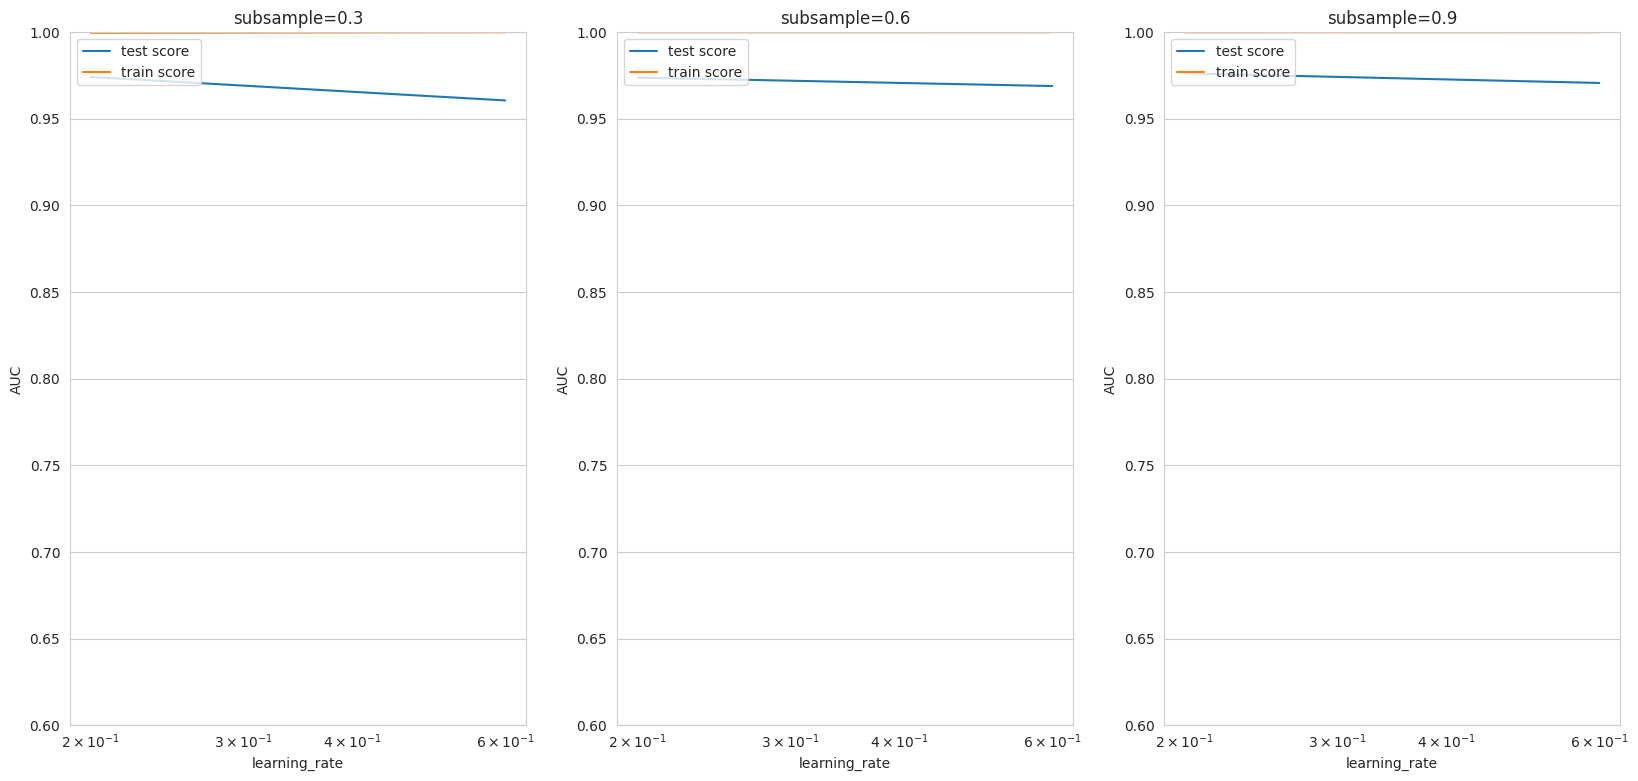

In [152]:
## plotting
plt.figure(figsize=(20,9))

param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


for n, subsample in enumerate(param_grid['subsample']):


    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

##### Model with optimal hyperparameters
We see that the train score almost touches to 1. Among the hyperparameters, we can choose the best parameters as learning_rate : 0.2 and subsample: 0.3

In [153]:
model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.9}

In [154]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.2,
          'max_depth': 2,
          'n_estimators':300,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_imb_model = XGBClassifier(params = params)
xgb_imb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 300,
                      'objective': 'binary:logistic', 'subsample': 0.9}, ...)

##### Prediction on the train set

In [155]:
# Predictions on the train set
y_train_pred = xgb_imb_model.predict(X_train)

In [156]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[227449      0]
 [     0    396]]


In [194]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [158]:
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))
print("Sensitivity:-",TP / float(TP+FN))
print("Specificity:-", TN / float(TN+FP))
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 1.0


In [159]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00       396

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845



In [160]:
# Predicted probability
y_train_pred_proba_imb_xgb = xgb_imb_model.predict_proba(X_train)[:,1]

In [161]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba_imb_xgb)
auc

1.0

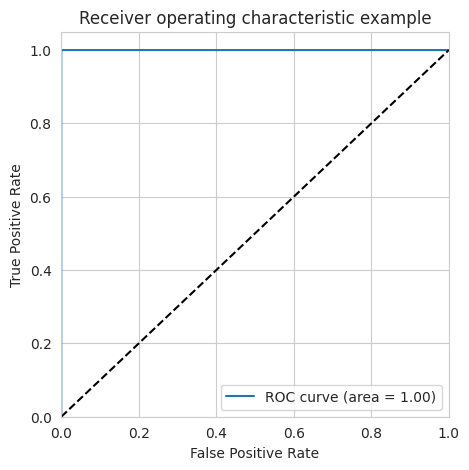

In [162]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_imb_xgb)

##### Prediction on the test set

In [163]:
# Predictions on the test set
y_test_pred = xgb_imb_model.predict(X_test)

In [164]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56858     8]
 [   25    71]]


In [169]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))
print("Sensitivity:",TP / float(TP+FN))
print("Specificity:", TN / float(TN+FP))
print("F1-Score:", f1_score(y_test, y_test_pred))

Accuracy: 0.999420666409185
Sensitivity: 0.7395833333333334
Specificity: 0.9998593183976365
F1-Score: 0.8114285714285714


In [170]:
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.90      0.74      0.81        96

    accuracy                           1.00     56962
   macro avg       0.95      0.87      0.91     56962
weighted avg       1.00      1.00      1.00     56962



ROC SCORE:  0.9723599118981465


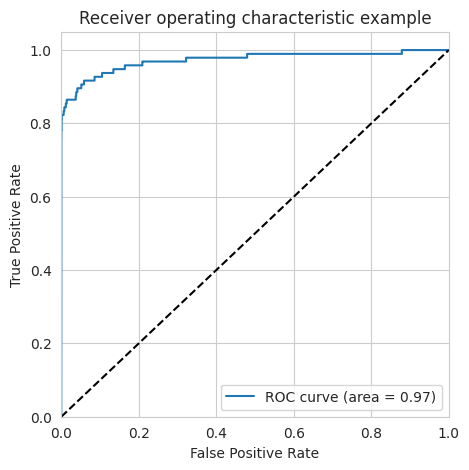

In [175]:
# roc_auc
y_test_pred_proba = xgb_imb_model.predict_proba(X_test)[:,1]
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
print("ROC SCORE: ", auc)
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 1
    - Sensitivity = 0.99
    - Specificity = 0.99
    - ROC-AUC = 0.99
    - F1-Score = 0.99
- Test set
    - Accuracy = 0.99
    - Sensitivity = 0.73
    - Specificity = 0.99
    - ROC-AUC = 0.97
    - F-Score = 0.81

Overall, the model is performing well in the test set, what it had learnt from the train set. Seems a case of overfit

## Decision Tree

In [82]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [177]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           scoring= 'roc_auc',
                           cv = 3,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [178]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       5.015905      0.593569         0.025872        0.001667   
1       5.152574      0.303874         0.029013        0.005581   
2       5.362016      0.740443         0.029283        0.005405   
3       5.002455      0.454460         0.029030        0.005619   
4       9.944556      0.583184         0.032917        0.007099   
5       9.960766      0.641074         0.027289        0.000423   
6       9.899199      0.499089         0.031360        0.006377   
7       9.991424      0.443723         0.031780        0.005562   

   param_max_depth  param_min_samples_leaf  param_min_samples_split  \
0                5                      50                       50   
1                5                      50                      100   
2                5                     100                       50   
3                5                     100                      100   
4               10                      50                       50   
5               10                      50                      100   
6               10                     100                       50   
7               10                     100                      100   

                                              params  split0_test_score  \
0  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.933337   
1  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.933337   
2  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.933279   
3  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.933282   
4  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.924922   
5  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.924972   
6  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.933451   
7  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.933446   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.933183           0.923870         0.930130        0.004427   
1           0.933183           0.923878         0.930133        0.004423   
2           0.936720           0.944598         0.938199        0.004738   
3           0.936720           0.944598         0.938200        0.004737   
4           0.916440           0.930451         0.923938        0.005762   
5           0.923877           0.937971         0.928940        0.006401   
6           0.919682           0.944109         0.932414        0.009999   
7           0.919679           0.944092         0.932406        0.009994   

   rank_test_score  
0                6  
1                5  
2                2  
3                1  
4                8  
5                7  
6                3  
7                4

In [181]:
print("Best roc_auc:", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc: 0.9382001202914115
DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=100)


In [182]:
# Model with optimal hyperparameters
dt_imb_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=5,
                                  min_samples_leaf=100,
                                  min_samples_split=100)

dt_imb_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=100,
                       random_state=100)

##### Prediction on the train set

In [183]:
# Predictions on the train set
y_train_pred = dt_imb_model.predict(X_train)

In [184]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train)
print(confusion)

[[227449      0]
 [     0    396]]


In [196]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [186]:
print("Accuracy:",metrics.accuracy_score(y_train, y_train_pred))
print("Sensitivity:",TP / float(TP+FN))
print("Specificity:", TN / float(TN+FP))
print("F1-Score:", f1_score(y_train, y_train_pred))

Accuracy:- 0.9991704887094297
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 0.749003984063745


In [187]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.79      0.71      0.75       396

    accuracy                           1.00    227845
   macro avg       0.89      0.86      0.87    227845
weighted avg       1.00      1.00      1.00    227845



In [188]:
# Predicted probability
y_train_pred_proba = dt_imb_model.predict_proba(X_train)[:,1]

In [189]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
auc

0.9534547393930157

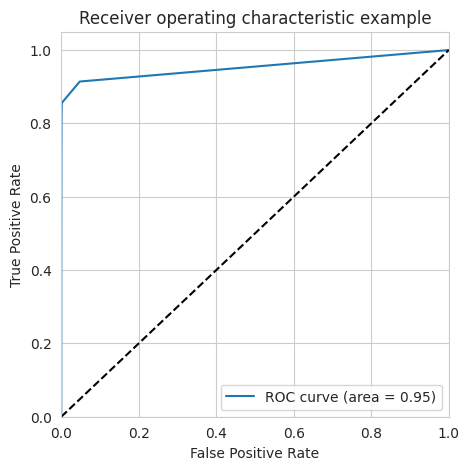

In [190]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)


##### Prediction on the test set

In [191]:
# Predictions on the test set
y_test_pred = dt_imb_model.predict(X_test)

In [197]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix: \n ",confusion)

Confusion Matrix: 
  [[56836    30]
 [   40    56]]


In [199]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))
print("Sensitivity:",TP / float(TP+FN))
print("Specificity:", TN / float(TN+FP))
print("F1-Score:", f1_score(y_train, y_train_pred))

Accuracy: 0.9987711105649381
Sensitivity: 0.5833333333333334
Specificity: 0.9994724439911371
F1-Score: 0.749003984063745


In [200]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.65      0.58      0.62        96

    accuracy                           1.00     56962
   macro avg       0.83      0.79      0.81     56962
weighted avg       1.00      1.00      1.00     56962



In [201]:
y_test_pred_proba = dt_imb_model.predict_proba(X_test)[:,1]

ROC_AUC_SCORE:  0.92174979703748


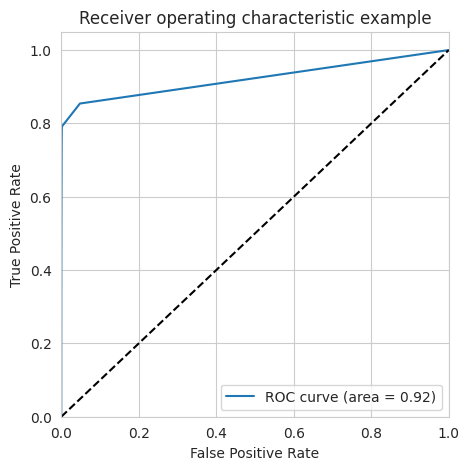

In [202]:
# ROC CURVE
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
print("ROC_AUC_SCORE: ", auc)
draw_roc(y_test, y_test_pred_proba)

ROC Curve is 0.92

## Random forest

In [83]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [204]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300],
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf,
                           param_grid = param_grid,
                           cv = 2,
                           n_jobs = -1,
                           verbose = 1,
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train, y_train)


Fitting 2 folds for each of 24 candidates, totalling 48 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [205]:
# printing the optimal accuracy score and hyperparameters
print('Getting accuracy of ',grid_search.best_score_,' using ',grid_search.best_params_)

Getting accuracy of  0.9992758232645806  using  {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 300}


In [206]:
# model with the best hyperparameters

rfc_imb_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50,
                             min_samples_split=50,
                             max_features=10,
                             n_estimators=100)

In [207]:
# Fit the model
rfc_imb_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=50)

##### Prediction on the train set

In [209]:
# Predictions on the train set
y_train_pred = rfc_imb_model.predict(X_train)
confusion = metrics.confusion_matrix(y_train, y_train)
print("Confusion Matrix\n",confusion)

Confusion Matrix
 [[227449      0]
 [     0    396]]


In [210]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print("Accuracy:",metrics.accuracy_score(y_train, y_train_pred))
print("Sensitivity:",TP / float(TP+FN))
print("Specificity:", TN / float(TN+FP))
print("F1-Score:", f1_score(y_train, y_train_pred))

Accuracy: 0.9993723803462881
Sensitivity: 1.0
Specificity: 1.0
F1-Score: 0.8049113233287858


In [211]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.88      0.74      0.80       396

    accuracy                           1.00    227845
   macro avg       0.94      0.87      0.90    227845
weighted avg       1.00      1.00      1.00    227845



ROC AUC SCORE:  0.9806463051701545


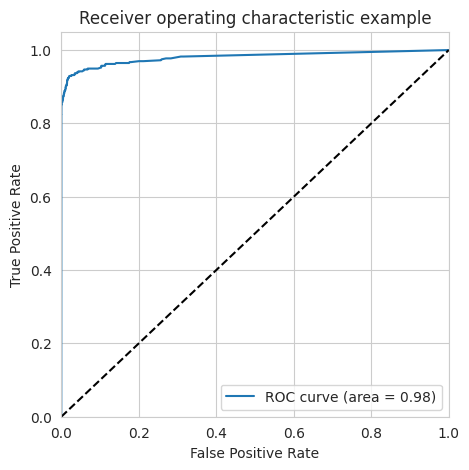

In [213]:
# Predicted probability
y_train_pred_proba = rfc_imb_model.predict_proba(X_train)[:,1]
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
print("ROC AUC SCORE: ", auc)
draw_roc(y_train, y_train_pred_proba)

##### Prediction on the test set

In [216]:
y_test_pred = rfc_imb_model.predict(X_test)
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", confusion)

Confusion Matrix:
 [[56842    24]
 [   34    62]]


In [217]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))
print("Sensitivity:-",TP / float(TP+FN))
print("Specificity:-", TN / float(TN+FP))
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9989817773252344
Sensitivity:- 0.6458333333333334
Specificity:- 0.9995779551929096
F1-Score:- 0.8049113233287858


In [220]:
print('CLASSIFICATION REPORT\n')
print(classification_report(y_test, y_test_pred))

CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.72      0.65      0.68        96

    accuracy                           1.00     56962
   macro avg       0.86      0.82      0.84     56962
weighted avg       1.00      1.00      1.00     56962



ROC AUC SCORE:  0.9645652718671965


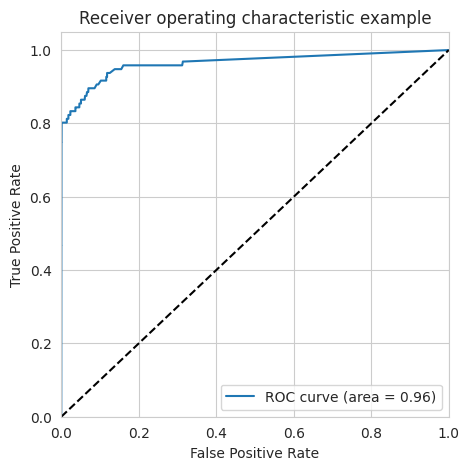

In [221]:
y_test_pred_proba = rfc_imb_model.predict_proba(X_test)[:,1]
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
print("ROC AUC SCORE: ", auc)
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.99
    - Sensitivity = 1.0
    - Specificity = 1.0
    - F1-Score = 0.80
    - ROC-AUC = 0.98
- Test set
    - Accuracy = 0.99
    - Sensitivity = 0.62
    - Specificity = 0.99
    - F-1 Score = 0.75
    - ROC-AUC = 0.96


Among the models we evaluated — Logistic Regression, XGBoost, Decision Tree, and Random Forest — most demonstrated strong performance. However, Logistic Regression and XGBoost stood out with the highest ROC-AUC scores.

After careful consideration, XGBoost emerges as the optimal choice, achieving an impressive ROC-AUC score of 1.0 on the training data and 0.98 on the test data.

While XGBoost demands significantly more computational resources compared to Logistic Regression, the 0.01 improvement in the ROC-AUC score (from 0.97 to 0.98) has the potential to deliver substantial cost savings for the bank. This makes XGBoost a justifiable and valuable investment despite its higher computational expense.

## Important Features of the Best Model to Understand the Dataset

#### Feature Importance
- Helps identify the key factors contributing to the model's predictions.
- For models like **XGBoost** or **Random Forest**, feature importance can be directly extracted to understand significant predictors.

#### Limitations with Transformed Datasets
- Dimensionality reduction techniques like **PCA** transform original features into new components.
- These components are linear combinations of original features, reducing interpretability of feature importance.

#### Interpretable Features in Non-Transformed Datasets
- Feature importance directly corresponds to original features, aiding in understanding the dataset's relationships.
- Provides actionable insights when the dataset is raw or minimally processed.

In [49]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

Top var = 14
2nd Top var = 7
3rd Top var = 10


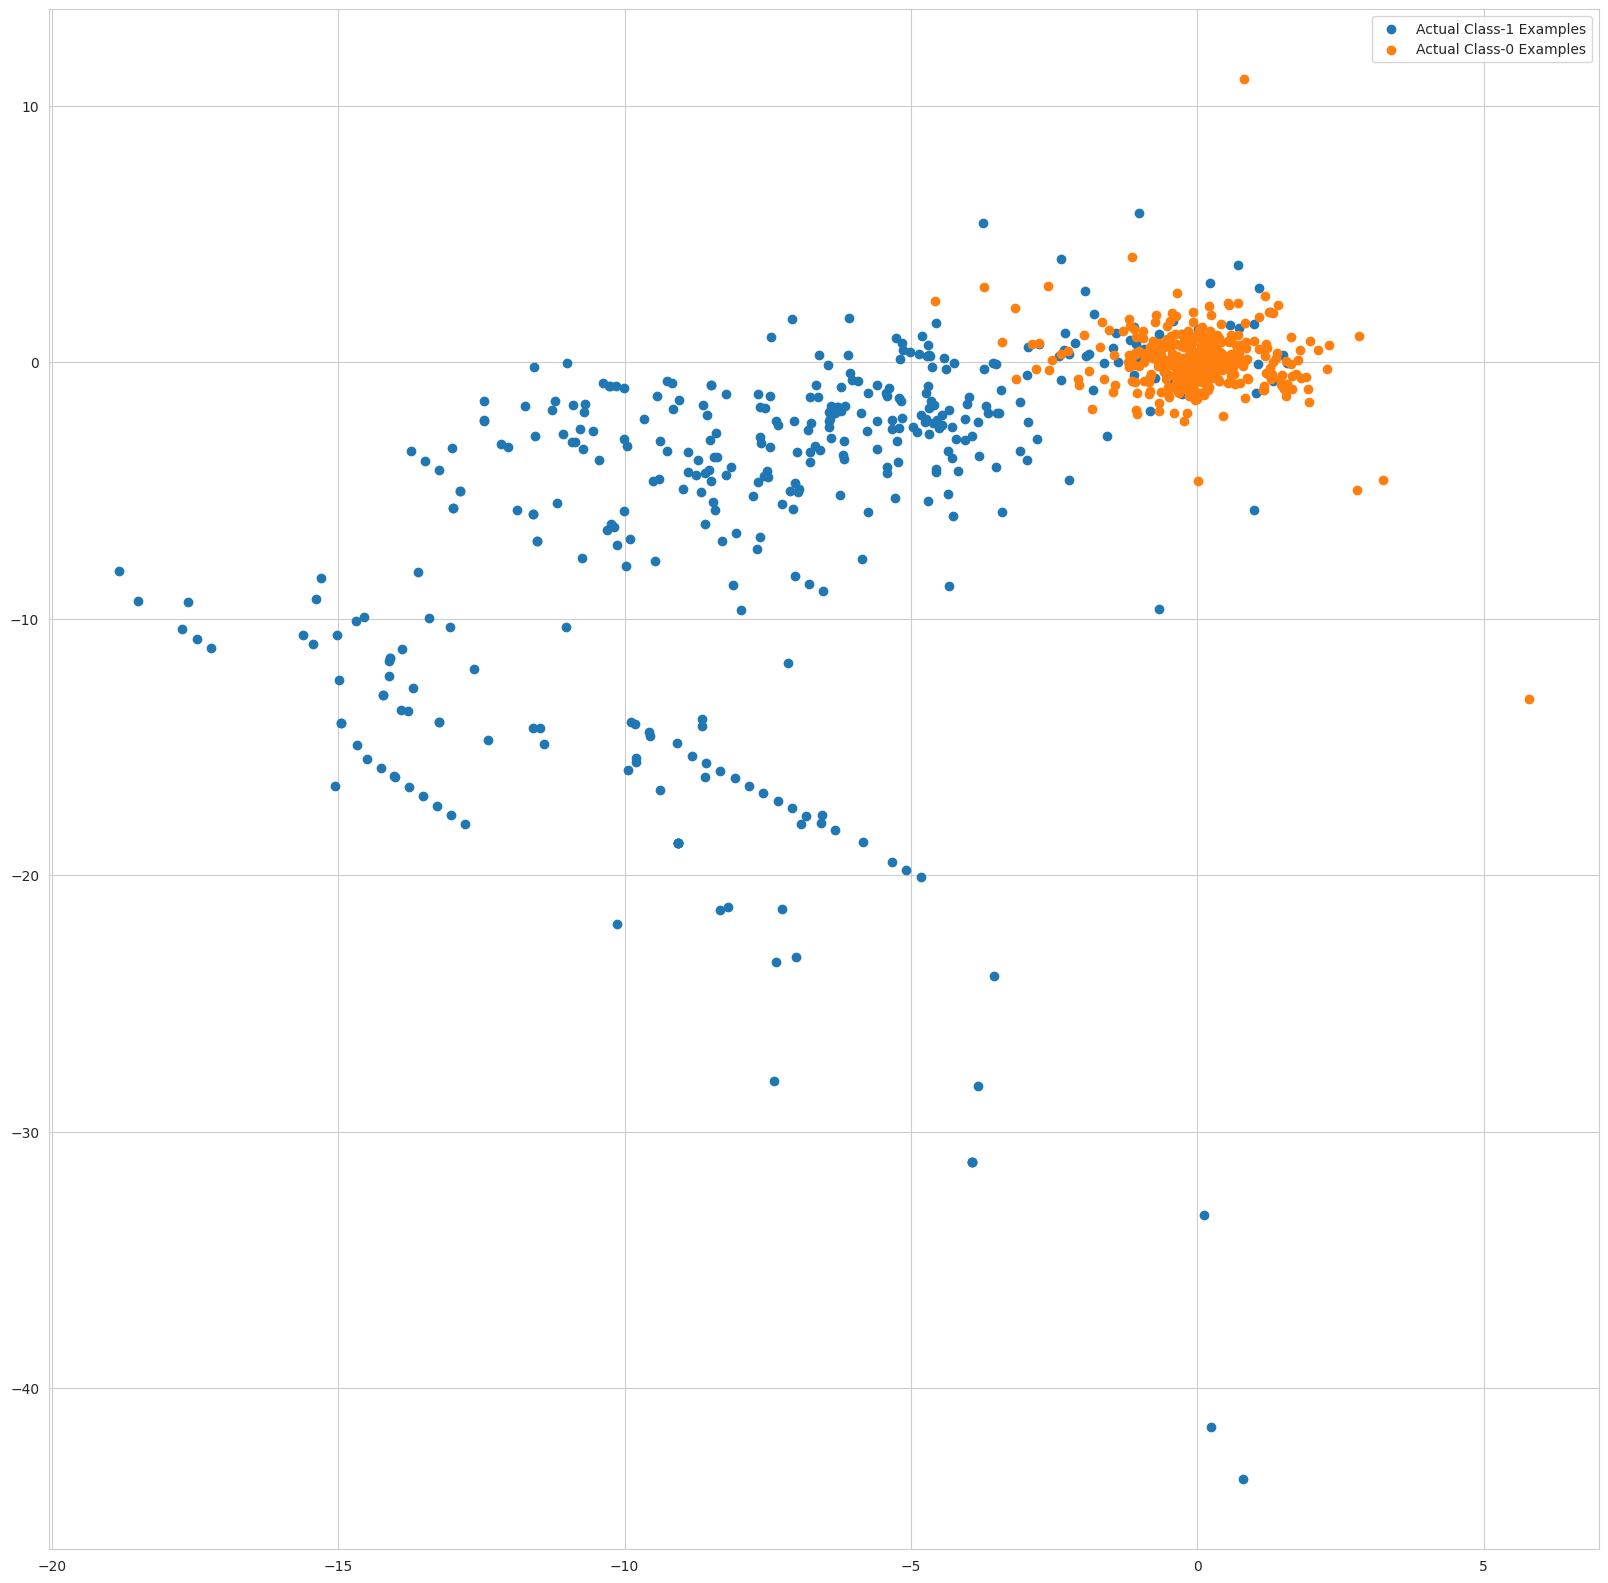

In [222]:
var_imp = []
for i in xgb_imb_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-3])+1)
# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [223]:
print('Train auc =', metrics.roc_auc_score(y_train, y_train_pred_proba_imb_xgb))
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred_proba_imb_xgb)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Train auc = 1.0
Threshold= 0.82052475


We can see that the threshold is 0.82, for which the TPR is the highest and FPR is the lowest and we got the best ROC score.

## Techniques for Balancing Classes

- **Random Oversampling**  
  - Randomly duplicates samples from the minority class (e.g., fraudulent transactions) to increase its representation.  
  - Balances the class distribution by matching the minority class size to that of the majority class.

- **SMOTE (Synthetic Minority Over-sampling Technique)**  
  - Generates synthetic samples for the minority class using the nearest neighbor algorithm.  
  - Effectively balances the dataset while reducing the risk of overfitting compared to simple oversampling.

- **ADASYN (Adaptive Synthetic Sampling)**  
  - Similar to SMOTE but focuses on generating synthetic data in regions with sparse and complex imbalanced data points.  
  - Adapts to dataset complexity, providing a more nuanced approach to balancing.

# Oversampling

In [123]:
# Importing oversampler library
from imblearn.over_sampling import RandomOverSampler

# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from collections import Counter


In [37]:
# instantiating the random oversampler
ros = RandomOverSampler()
# resampling X, y
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

In [40]:
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution
print('New class distribution:-',Counter(y_train_ros))

Before sampling class distribution:- Counter({0: 227449, 1: 396})
New class distribution:- Counter({0: 227449, 1: 227449})


## KNN

In [50]:
pip install faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.5/27.5 MB 20.7 MB/s eta 0:00:00


In [162]:
# Importing oversampler library
from imblearn.over_sampling import RandomOverSampler
from collections import Counter


import numpy as np
import faiss
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, roc_auc_score

In [38]:
# Simulate an imbalanced dataset (replace with your actual dataset)
np.random.seed(42)
X = np.random.rand(300000, 20).astype('float32')  # 300,000 samples, 20 features
y = np.hstack([np.zeros(295000), np.ones(5000)]).astype('int')  # Highly imbalanced


In [39]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [163]:
# Apply SMOTE for class balancing
smote = SMOTE(random_state=42, n_jobs=-1)  # Use parallel processing for faster oversampling
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print(f"Original dataset shape: {np.bincount(y_train)}")
print(f"Balanced dataset shape: {np.bincount(y_train_balanced)}")

Original dataset shape: [227449    396]
Balanced dataset shape: [227449 227449]


In [41]:
# Create a FAISS index (L2 norm)
index = faiss.IndexFlatL2(X_train_balanced.shape[1])  # 20 features
index.add(X_train_balanced)  # Add oversampled training data to the index


In [42]:
# Function to predict using FAISS
def faiss_knn_predict(index, X_test, y_train, k=5):
    distances, indices = index.search(X_test.astype('float32'), k)  # k nearest neighbors
    predictions = []
    for idx in indices:
        # Majority vote from k nearest neighbors
        votes = y_train[idx]
        predictions.append(np.bincount(votes).argmax())
    return np.array(predictions)


In [43]:
# Predict using FAISS
k = 5  # Number of neighbors
y_pred = faiss_knn_predict(index, X_test, y_train_balanced, k=k)


In [44]:
# Evaluate performance
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC Score: {roc_auc}")

ROC-AUC Score: 0.5007881355932203


In [45]:
# Evaluate model performance
print("Classification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.79      0.88     59000
           1       0.02      0.21      0.03      1000

    accuracy                           0.78     60000
   macro avg       0.50      0.50      0.45     60000
weighted avg       0.97      0.78      0.86     60000



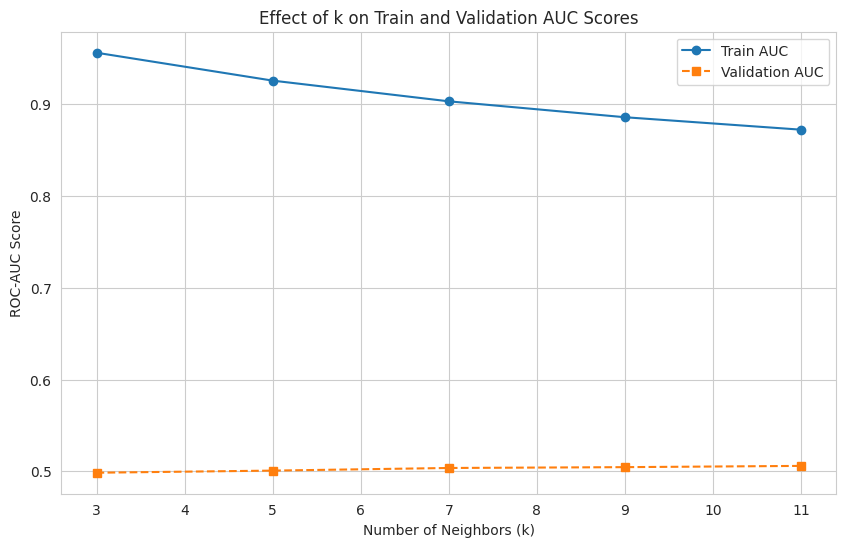

In [51]:

# List of k values to evaluate
k_values = [3, 5, 7, 9, 11]

# Placeholder for storing scores
train_scores = []
validation_scores = []

# Iterate over k values
for k in k_values:
    # Train predictions (on oversampled data)
    y_train_pred = faiss_knn_predict(index, X_train_balanced, y_train_balanced, k=k)
    train_auc = roc_auc_score(y_train_balanced, y_train_pred)  # AUC for train data

    # Test predictions
    y_test_pred = faiss_knn_predict(index, X_test, y_train_balanced, k=k)
    validation_auc = roc_auc_score(y_test, y_test_pred)  # AUC for validation/test data

    # Store scores
    train_scores.append(train_auc)
    validation_scores.append(validation_auc)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_scores, label="Train AUC", marker='o', linestyle='-')
plt.plot(k_values, validation_scores, label="Validation AUC", marker='s', linestyle='--')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("ROC-AUC Score")
plt.title("Effect of k on Train and Validation AUC Scores")
plt.legend()
plt.grid(True)
plt.show()

## Logistic Regression

In [53]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression


In [102]:

# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# Fit the model
model_cv.fit(X_train_ros, y_train_ros)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [103]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_C  \
0       1.608614      0.358660         0.071561        0.026606     0.01   
1       1.673845      0.382109         0.057003        0.001189     0.10   
2       1.957613      0.481551         0.076778        0.023872     1.00   
3       1.400028      0.068162         0.056068        0.000884    10.00   
4       1.862790      0.416889         0.088799        0.026819   100.00   
5       1.591388      0.457804         0.067522        0.018295  1000.00   

        params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.01}           0.988581           0.988234           0.988176   
1   {'C': 0.1}           0.988594           0.988263           0.988202   
2     {'C': 1}           0.988593           0.988266           0.988204   
3    {'C': 10}           0.988594           0.988267           0.988204   
4   {'C': 100}           0.988594           0.988267           0.988204   
5  {'C': 1000}           0.988594           0.988267           0.988204   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.988555           0.988823         0.988474        0.000239   
1           0.988552           0.988850         0.988492        0.000236   
2           0.988551           0.988856         0.988494        0.000237   
3           0.988551           0.988856         0.988494        0.000237   
4           0.988551           0.988856         0.988494        0.000237   
5           0.988551           0.988856         0.988494        0.000237   

   rank_test_score  split0_train_score  split1_train_score  \
0                6            0.988518            0.988467   
1                5            0.988542            0.988487   
2                2            0.988543            0.988489   
3                1            0.988543            0.988489   
4                4            0.988543            0.988489   
5                3            0.988543            0.988489   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.988571            0.988530            0.988393   
1            0.988582            0.988546            0.988405   
2            0.988583            0.988546            0.988411   
3            0.988583            0.988547            0.988410   
4            0.988583            0.988547            0.988410   
5            0.988583            0.988547            0.988410   

   mean_train_score  std_train_score  
0          0.988496         0.000061  
1          0.988512         0.000062  
2          0.988514         0.000060  
3          0.988514         0.000060  
4          0.988514         0.000060  
5          0.988514         0.000060

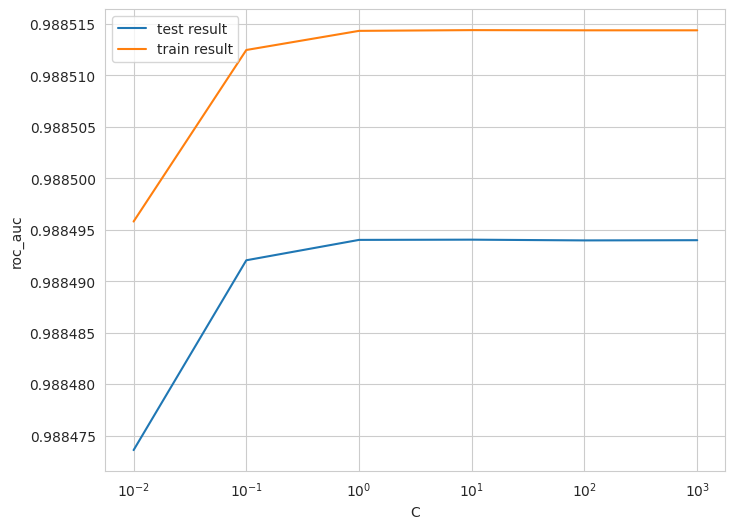

In [104]:
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [105]:
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9884940406141933 at C = 10


#### Logistic regression with optimal C

In [106]:
# Instantiate the model with best C
logistic_bal_rus = LogisticRegression(C=0.1)

In [108]:
# Fit the model on the train set
logistic_bal_rus_model = logistic_bal_rus.fit(X_train_ros, y_train_ros)

##### Prediction on the train set

In [109]:
# Predictions on the train set
y_train_pred = logistic_bal_rus_model.predict(X_train_ros)

In [114]:
confusion = metrics.confusion_matrix(y_train_ros, y_train_pred)
print("Confusion Matrix\n", confusion)

Confusion Matrix
 [[222227   5222]
 [ 17409 210040]]


In [116]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print("Accuracy:",metrics.accuracy_score(y_train_ros, y_train_pred))
print("Sensitivity:",TP / float(TP+FN))
print("Specificity:", TN / float(TN+FP))
print("F1-Score:", f1_score(y_train_ros, y_train_pred))

Accuracy: 0.9502503858007729
Sensitivity: 0.9234597646065712
Specificity: 0.9770410069949746
F1-Score: 0.9488808726234496


In [117]:
# classification_report
print(classification_report(y_train_ros, y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95    227449
           1       0.98      0.92      0.95    227449

    accuracy                           0.95    454898
   macro avg       0.95      0.95      0.95    454898
weighted avg       0.95      0.95      0.95    454898



In [118]:
y_train_pred_proba = logistic_bal_rus_model.predict_proba(X_train_ros)[:,1]
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
print('ROC AUC SCORE: ', auc)


ROC AUC SCORE:  0.9885048766586002


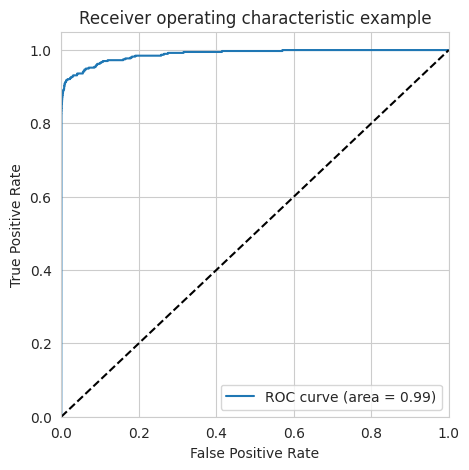

In [119]:
# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

#### Prediction on the test set

In [120]:
# Prediction on the test set
y_test_pred = logistic_bal_rus_model.predict(X_test)

In [122]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix\n", confusion)

Confusion Matrix
 [[55527  1339]
 [   11    85]]


In [123]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))
print("Sensitivity:",TP / float(TP+FN))
print("Specificity:", TN / float(TN+FP))
print("F1-Score:", f1_score(y_test, y_test_pred))

Accuracy: 0.976299989466662
Sensitivity: 0.8854166666666666
Specificity: 0.9764534168044174
F1-Score: 0.1118421052631579


In [124]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.06      0.89      0.11        96

    accuracy                           0.98     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [127]:
# Predicted probability
y_test_pred_proba = logistic_bal_rus_model.predict_proba(X_test)[:,1]
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
print("ROC AUC SCORE: ", auc)

ROC AUC SCORE:  0.9705185948838791


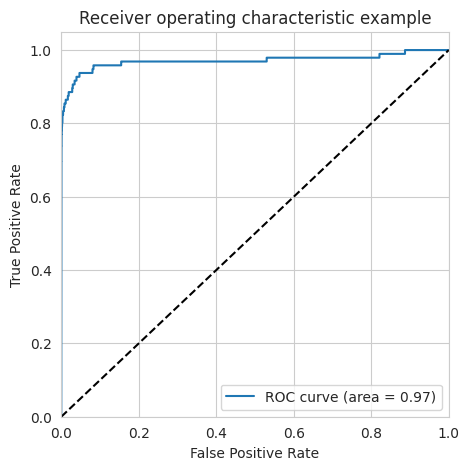

In [128]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.95
    - Sensitivity = 0.92
    - Specificity = 0.98
    - ROC = 0.99
- Test set
    - Accuracy = 0.97
    - Sensitivity = 0.86
    - Specificity = 0.97
    - ROC = 0.96

## XGBoost

In [131]:
# hyperparameter tuning with XGBoost

# creating a KFold object
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train_ros, y_train_ros)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [132]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      11.669892      0.934058         0.283565        0.013346   
1       9.830233      1.735606         0.356630        0.110287   
2      15.364027      4.068383         0.616133        0.370112   
3      26.735347      4.778295         0.564389        0.116938   
4      19.009883      6.668491         0.532808        0.283949   
5       9.705096      1.680387         0.275602        0.005786   

   param_learning_rate  param_subsample  \
0                  0.2              0.3   
1                  0.2              0.6   
2                  0.2              0.9   
3                  0.6              0.3   
4                  0.6              0.6   
5                  0.6              0.9   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}           0.999886   
1  {'learning_rate': 0.2, 'subsample': 0.6}           0.999910   
2  {'learning_rate': 0.2, 'subsample': 0.9}           0.999896   
3  {'learning_rate': 0.6, 'subsample': 0.3}           0.999984   
4  {'learning_rate': 0.6, 'subsample': 0.6}           0.999994   
5  {'learning_rate': 0.6, 'subsample': 0.9}           0.999996   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.999908           0.999904         0.999899        0.000010   
1           0.999905           0.999902         0.999906        0.000003   
2           0.999910           0.999887         0.999898        0.000009   
3           0.999977           0.999973         0.999978        0.000004   
4           0.999985           0.999983         0.999987        0.000005   
5           0.999987           0.999981         0.999988        0.000006   

   rank_test_score  split0_train_score  split1_train_score  \
0                5            0.999896            0.999920   
1                4            0.999915            0.999911   
2                6            0.999906            0.999918   
3                3            0.999998            0.999993   
4                2            0.999999            0.999997   
5                1            0.999998            0.999996   

   split2_train_score  mean_train_score  std_train_score  
0            0.999922          0.999913     1.177410e-05  
1            0.999919          0.999915     3.112949e-06  
2            0.999916          0.999913     5.106903e-06  
3            0.999997          0.999996     2.279740e-06  
4            0.999999          0.999998     9.067253e-07  
5            1.000000          0.999998     1.617189e-06

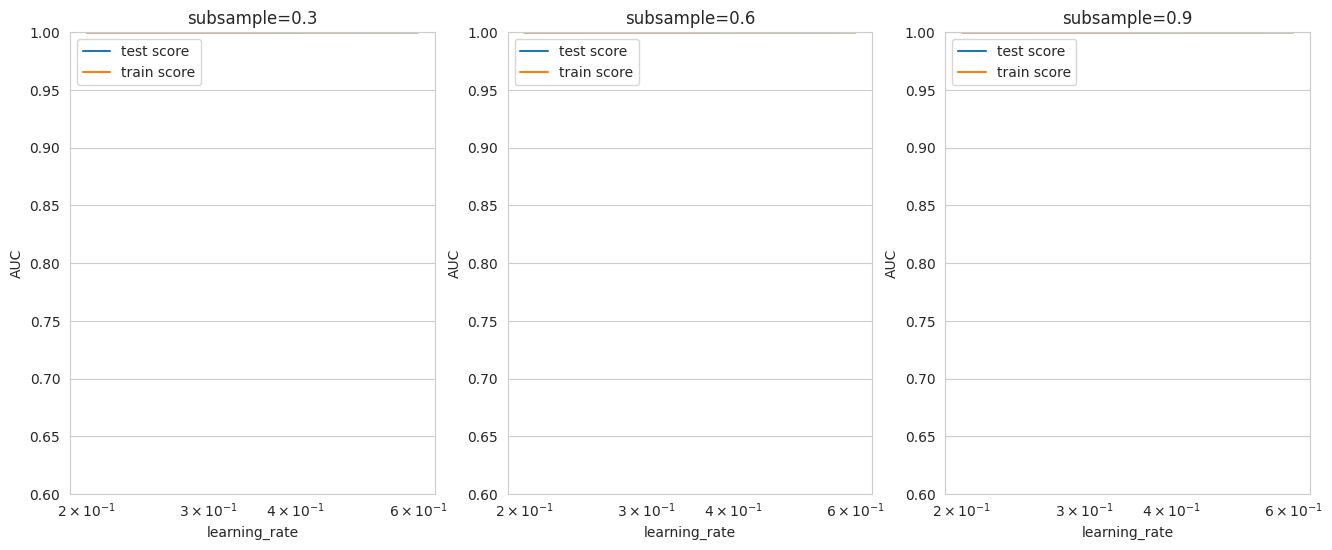

In [133]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


for n, subsample in enumerate(param_grid['subsample']):


    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

##### Optimal hyperparameters
The training score is nearly perfect, close to 1. Based on the hyperparameter tuning, the optimal parameters are `learning_rate: 0.2` and `subsample: 0.3`.


In [134]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [135]:
# chosen hyperparameters
params = {'learning_rate': 0.6,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_ros_model = XGBClassifier(params = params)
xgb_bal_ros_model.fit(X_train_ros, y_train_ros)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9}, ...)

##### Prediction on the train set

In [136]:
# Predictions on the train set
y_train_pred = xgb_bal_ros_model.predict(X_train_ros)

In [139]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_ros, y_train_ros)
print("Confusion Matrix: ", confusion)

Confusion Matrix:  [[227449      0]
 [     0 227449]]


In [140]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print("Accuracy: ",metrics.accuracy_score(y_train_ros, y_train_pred))
print("Sensitivity:",TP / float(TP+FN))
print("Specificity:", TN / float(TN+FP))
print("F1-Score:", f1_score(y_train_ros, y_train_pred))

Accuracy:  1.0
Sensitivity: 1.0
Specificity: 1.0
F1-Score: 1.0


In [142]:
# classification_report
print(classification_report(y_train_ros, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00    227449

    accuracy                           1.00    454898
   macro avg       1.00      1.00      1.00    454898
weighted avg       1.00      1.00      1.00    454898



In [143]:
y_train_pred_proba = xgb_bal_ros_model.predict_proba(X_train_ros)[:,1]
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
print("ROC AUC SCORE: ", auc)

ROC AUC SCORE:  1.0


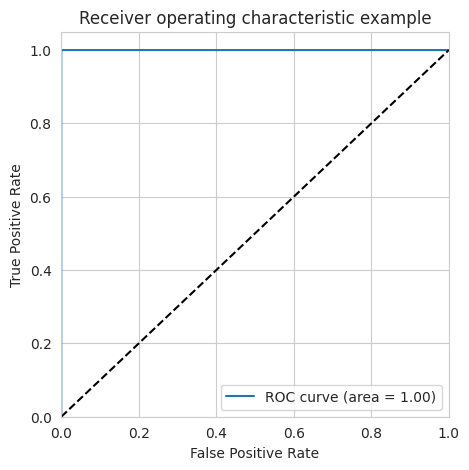

In [144]:
# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

##### Prediction on the test set

In [145]:
# Predictions on the test set
y_test_pred = xgb_bal_ros_model.predict(X_test)

In [149]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print("confusion Matrix: ", confusion)

confusion Matrix:  [[56856    10]
 [   22    74]]


In [150]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))
print("Sensitivity:",TP / float(TP+FN))
print("Specificity:", TN / float(TN+FP))
print("F1-Score:", f1_score(y_test, y_test_pred))

Accuracy: 0.9994382219725431
Sensitivity: 0.7708333333333334
Specificity: 0.9998241479970457
F1-Score: 0.8222222222222222


In [151]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.88      0.77      0.82        96

    accuracy                           1.00     56962
   macro avg       0.94      0.89      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [153]:
y_test_pred_proba = xgb_bal_ros_model.predict_proba(X_test)[:,1]
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
print("ROC AUC SCORE: ", auc)

ROC AUC SCORE:  0.9725747810642563


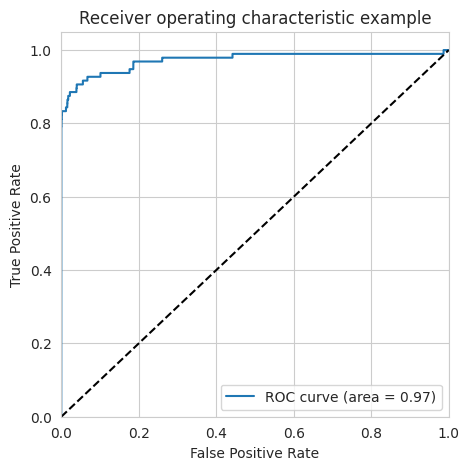

In [154]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 1.0
    - Sensitivity = 1.0
    - Specificity = 1.0
    - ROC-AUC = 1.0
- Test set
    - Accuracy = 0.99
    - Sensitivity = 0.80
    - Specificity = 0.99
    - ROC-AUC = 0.97

## Decision Tree

In [157]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           scoring= 'roc_auc',
                           cv = 3,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_ros,y_train_ros)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [158]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       7.320082      0.789280         0.077775        0.011343   
1       7.841170      0.754258         0.070963        0.014375   
2       7.330412      0.742839         0.083522        0.014469   
3       7.841205      0.732059         0.072819        0.014266   
4      11.396203      0.862244         0.084189        0.014677   
5      11.297514      0.653826         0.072304        0.013387   
6      11.831302      0.177439         0.063497        0.001058   
7      13.426142      3.225749         0.075110        0.015945   

   param_max_depth  param_min_samples_leaf  param_min_samples_split  \
0                5                      50                       50   
1                5                      50                      100   
2                5                     100                       50   
3                5                     100                      100   
4               10                      50                       50   
5               10                      50                      100   
6               10                     100                       50   
7               10                     100                      100   

                                              params  split0_test_score  \
0  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.990267   
1  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.990267   
2  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.990246   
3  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.990253   
4  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.999557   
5  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.999498   
6  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.999597   
7  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.999612   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.990132           0.991137         0.990512        0.000446   
1           0.990135           0.991137         0.990513        0.000445   
2           0.990046           0.990862         0.990384        0.000347   
3           0.990046           0.990862         0.990387        0.000346   
4           0.999646           0.999659         0.999621        0.000045   
5           0.999588           0.999688         0.999591        0.000078   
6           0.999736           0.999515         0.999616        0.000091   
7           0.999725           0.999434         0.999590        0.000120   

   rank_test_score  
0                6  
1                5  
2                8  
3                7  
4                1  
5                3  
6                2  
7                4

In [159]:
# best Estimater
print(grid_search.best_estimator_)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [160]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc: ", grid_search.best_score_)


Best roc_auc:  0.9996208060370292


In [161]:
# Model with optimal hyperparameters
dt_bal_ros_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=10,
                                  min_samples_leaf=100,
                                  min_samples_split=50)

dt_bal_ros_model.fit(X_train_ros, y_train_ros)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50,
                       random_state=100)

#### Prediction on the train set

In [164]:
y_train_pred = dt_bal_ros_model.predict(X_train_ros)
print(classification_report(y_train_ros, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    227449
           1       0.99      1.00      1.00    227449

    accuracy                           1.00    454898
   macro avg       1.00      1.00      1.00    454898
weighted avg       1.00      1.00      1.00    454898



In [165]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_ros, y_train_pred)
print("Confusion Matrix\n", confusion)

Confusion Matrix
 [[225948   1501]
 [     0 227449]]


In [166]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print("Accuracy: ",metrics.accuracy_score(y_train_ros, y_train_pred))
print("Sensitivity: ",TP / float(TP+FN))
print("Specificity: ", TN / float(TN+FP))
print("F1-Score:", f1_score(y_train_ros, y_train_pred))

Accuracy:  0.9967003592014034
Sensitivity:  1.0
Specificity:  0.9934007184028067
F1-Score: 0.9967112110236876


In [167]:
# ROC AUC SCORE
y_train_pred_proba = dt_bal_ros_model.predict_proba(X_train_ros)[:,1]
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
print("ROC AUC SCORE: ", auc)

ROC AUC SCORE:  0.9997708477646352


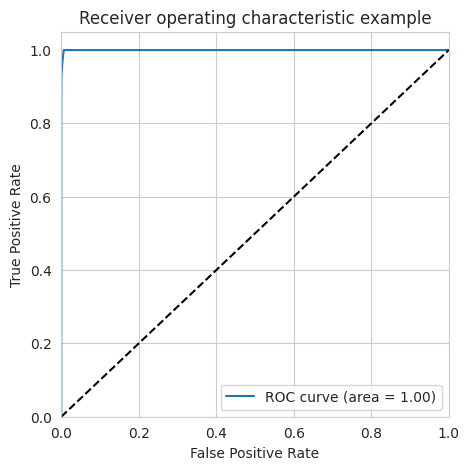

In [168]:
# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

##### Prediction on the test set

In [169]:
# Predictions on the test set
y_test_pred = dt_bal_ros_model.predict(X_test)

In [173]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix\n", confusion)

Confusion Matrix
 [[56452   414]
 [   20    76]]


In [174]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))
print("Sensitivity:",TP / float(TP+FN))
print("Specificity:", TN / float(TN+FP))
print("F1-Score:", f1_score(y_test, y_test_pred))

Accuracy: 0.9923808855026158
Sensitivity: 0.7916666666666666
Specificity: 0.9927197270776914
F1-Score: 0.2593856655290102


In [175]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56866
           1       0.16      0.79      0.26        96

    accuracy                           0.99     56962
   macro avg       0.58      0.89      0.63     56962
weighted avg       1.00      0.99      0.99     56962



In [176]:
# roc_auc
y_test_pred_proba = dt_bal_ros_model.predict_proba(X_test)[:,1]
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
print("ROC AUC SCORE: ", auc)

ROC AUC SCORE:  0.894915239334576


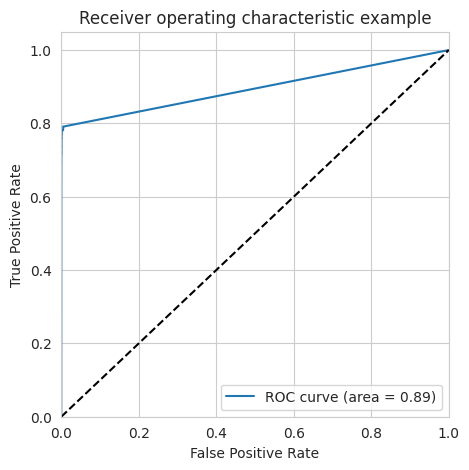

In [177]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.99
    - Sensitivity = 1.0
    - Specificity = 0.99
    - ROC-AUC = 1
- Test set
    - Accuracy = 0.99
    - Sensitivity = 0.79
    - Specificity = 0.99
    - ROC-AUC = 0.89

# SMOTE (Synthetic Minority Oversampling Technique)

In [125]:
# Importing SMOTE
from imblearn.over_sampling import SMOTE

In [126]:
# Create SMOTE instance
smote = SMOTE(random_state=42)

# Apply SMOTE to oversample the minority class
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [127]:
print('Before SMOTE oversampling X_train shape=',X_train.shape)
print('After SMOTE oversampling X_train shape=',X_train_smote.shape)

Before SMOTE oversampling X_train shape= (227845, 29)
After SMOTE oversampling X_train shape= (454898, 29)


## Logistic Regression

In [128]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# Fit the model
model_cv.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [129]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_C  \
0       1.348514      0.054212         0.058502        0.002515     0.01   
1       1.787448      0.414390         0.075853        0.024903     0.10   
2       1.594245      0.401485         0.067996        0.022014     1.00   
3       1.553904      0.350717         0.068485        0.023571    10.00   
4       1.768460      0.440401         0.077370        0.025746   100.00   
5       1.404059      0.057376         0.060098        0.005534  1000.00   

        params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.01}           0.989658           0.989739           0.990136   
1   {'C': 0.1}           0.989665           0.989763           0.990159   
2     {'C': 1}           0.989661           0.989764           0.990163   
3    {'C': 10}           0.989664           0.989764           0.990164   
4   {'C': 100}           0.989664           0.989764           0.990164   
5  {'C': 1000}           0.989664           0.989764           0.990164   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.989864           0.990092         0.989898        0.000189   
1           0.989875           0.990120         0.989916        0.000194   
2           0.989875           0.990122         0.989917        0.000197   
3           0.989875           0.990122         0.989918        0.000196   
4           0.989875           0.990122         0.989918        0.000196   
5           0.989875           0.990122         0.989918        0.000196   

   rank_test_score  split0_train_score  split1_train_score  \
0                6            0.989936            0.989912   
1                5            0.989961            0.989929   
2                4            0.989960            0.989929   
3                3            0.989962            0.989929   
4                1            0.989962            0.989929   
5                2            0.989962            0.989929   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.989854            0.989994            0.989873   
1            0.989869            0.990011            0.989893   
2            0.989873            0.990012            0.989894   
3            0.989874            0.990012            0.989894   
4            0.989874            0.990012            0.989894   
5            0.989874            0.990012            0.989894   

   mean_train_score  std_train_score  
0          0.989914         0.000049  
1          0.989933         0.000050  
2          0.989934         0.000049  
3          0.989934         0.000049  
4          0.989934         0.000049  
5          0.989934         0.000049

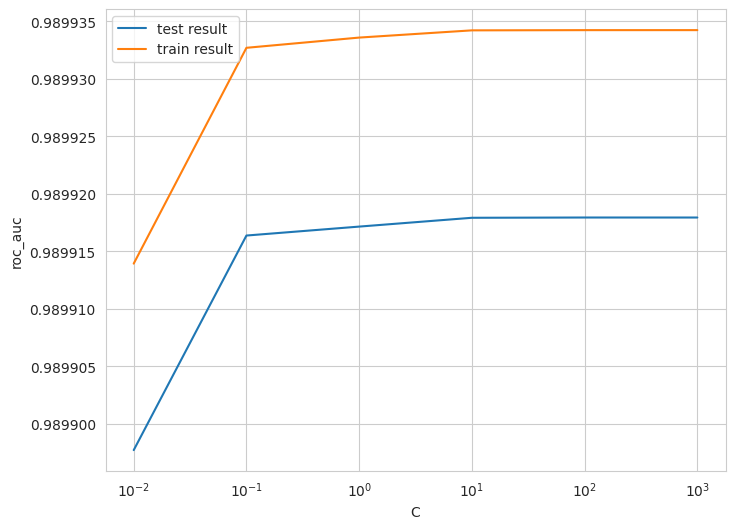

In [130]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [131]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9899179368921945 at C = 100


#### Logistic regression with optimal C

In [132]:
# Instantiate the model with best C
logistic_bal_smote = LogisticRegression(C=0.1)

In [133]:
# Fit the model on the train set
logistic_bal_smote_model = logistic_bal_smote.fit(X_train_smote, y_train_smote)

##### Prediction on the train set

In [134]:
# Predictions on the train set
y_train_pred = logistic_bal_smote_model.predict(X_train_smote)

In [135]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print("Confusion Matrix: ", confusion)

Confusion Matrix:  [[222000   5449]
 [ 17488 209961]]


In [136]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


print("Accuracy:",metrics.accuracy_score(y_train_smote, y_train_pred))
print("Sensitivity:",TP / float(TP+FN))
print("Specificity:", TN / float(TN+FP))
print("F1-Score:", f1_score(y_train_smote, y_train_pred))

Accuracy: 0.9495777075300397
Sensitivity: 0.9231124339961926
Specificity: 0.9760429810638869
F1-Score: 0.9482069913900361


In [137]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95    227449
           1       0.97      0.92      0.95    227449

    accuracy                           0.95    454898
   macro avg       0.95      0.95      0.95    454898
weighted avg       0.95      0.95      0.95    454898



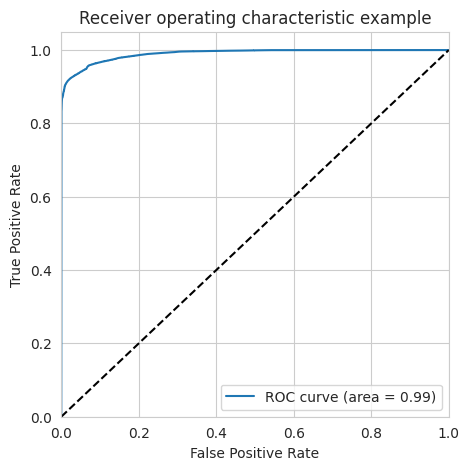

In [138]:

y_train_pred_proba_log_bal_smote = logistic_bal_smote_model.predict_proba(X_train_smote)[:,1]
draw_roc(y_train_smote, y_train_pred_proba_log_bal_smote)

#### Prediction on the test set

In [139]:
# Prediction on the test set
y_test_pred = logistic_bal_smote_model.predict(X_test)

In [140]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n",confusion)

Confusion Matrix:
 [[55446  1420]
 [   10    86]]


In [141]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))
print("Sensitivity:",TP / float(TP+FN))
print("Specificity:", TN / float(TN+FP))
print("F1-Score:", f1_score(y_test, y_test_pred))

Accuracy: 0.9748955443980197
Sensitivity: 0.8958333333333334
Specificity: 0.9750290155804875
F1-Score: 0.10736579275905118


In [142]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.06      0.90      0.11        96

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.97      0.99     56962



##### ROC on the test set

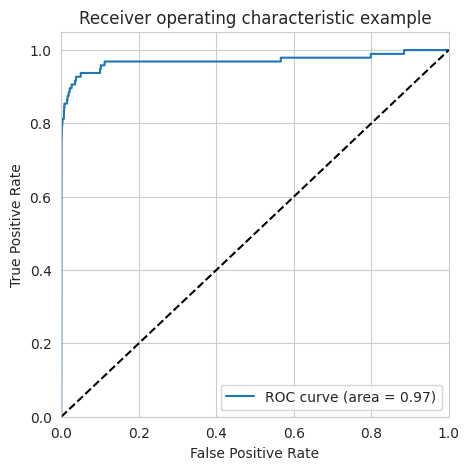

In [143]:
y_test_pred_proba = logistic_bal_smote_model.predict_proba(X_test)[:,1]
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.95
    - Sensitivity = 0.92
    - Specificity = 0.98
    - ROC = 0.99
- Test set
    - Accuracy = 0.97
    - Sensitivity = 0.90
    - Specificity = 0.99
    - ROC = 0.97

## XGBoost

In [202]:
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [203]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       9.918794      1.419427         0.362659        0.104441   
1      10.112450      0.953037         0.347131        0.090296   
2      10.098818      1.803279         0.354390        0.099756   
3       9.777389      1.528141         0.280389        0.003713   
4       9.634482      1.536609         0.332267        0.079360   
5       9.408730      1.510533         0.337664        0.075140   

   param_learning_rate  param_subsample  \
0                  0.2              0.3   
1                  0.2              0.6   
2                  0.2              0.9   
3                  0.6              0.3   
4                  0.6              0.6   
5                  0.6              0.9   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}           0.999647   
1  {'learning_rate': 0.2, 'subsample': 0.6}           0.999638   
2  {'learning_rate': 0.2, 'subsample': 0.9}           0.999625   
3  {'learning_rate': 0.6, 'subsample': 0.3}           0.999951   
4  {'learning_rate': 0.6, 'subsample': 0.6}           0.999958   
5  {'learning_rate': 0.6, 'subsample': 0.9}           0.999948   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.999722           0.999668         0.999679        0.000032   
1           0.999704           0.999704         0.999682        0.000031   
2           0.999723           0.999679         0.999676        0.000040   
3           0.999949           0.999944         0.999948        0.000003   
4           0.999959           0.999954         0.999957        0.000002   
5           0.999946           0.999950         0.999948        0.000002   

   rank_test_score  split0_train_score  split1_train_score  \
0                5            0.999708            0.999713   
1                4            0.999712            0.999683   
2                6            0.999697            0.999692   
3                2            0.999971            0.999976   
4                1            0.999975            0.999981   
5                3            0.999976            0.999972   

   split2_train_score  mean_train_score  std_train_score  
0            0.999706          0.999709         0.000003  
1            0.999738          0.999711         0.000023  
2            0.999719          0.999703         0.000012  
3            0.999972          0.999973         0.000002  
4            0.999974          0.999977         0.000003  
5            0.999976          0.999975         0.000002

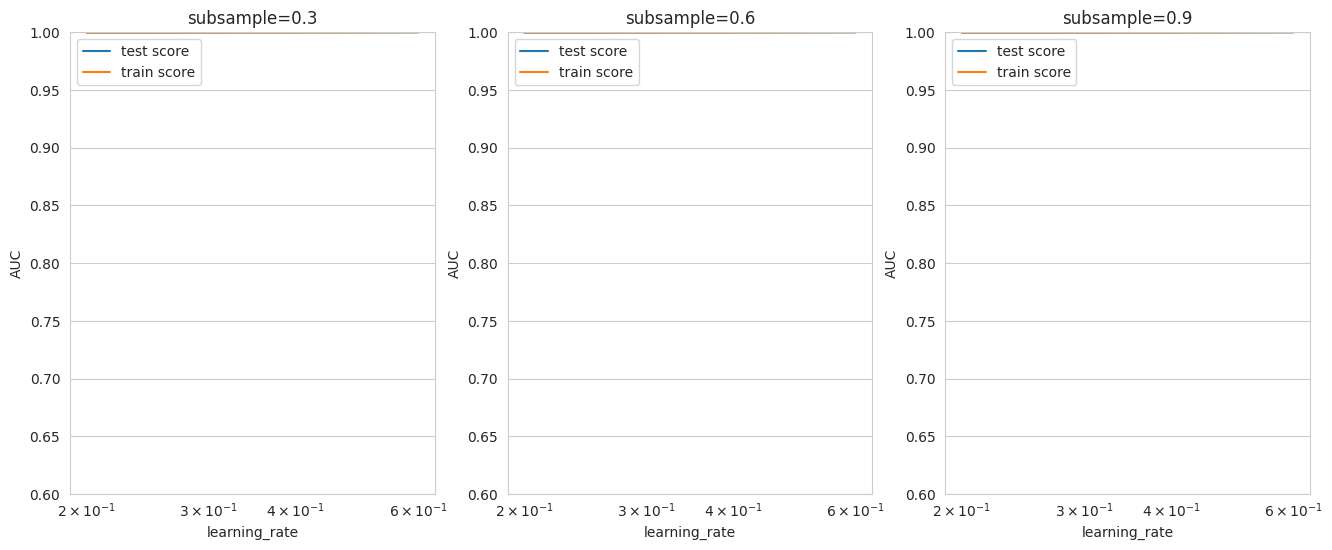

In [204]:
# plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


for n, subsample in enumerate(param_grid['subsample']):


    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [205]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.6}

In [206]:
# chosen hyperparameters
params = {'learning_rate': 0.6,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_smote_model = XGBClassifier(params = params)
xgb_bal_smote_model.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9}, ...)

#### Prediction on the train set

In [207]:
# Predictions on the train set
y_train_pred = xgb_bal_smote_model.predict(X_train_smote)

In [209]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print("Confusion Matrix:\n",confusion)

Confusion Matrix:
 [[227447      2]
 [     0 227449]]


In [210]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print("Accuracy:",metrics.accuracy_score(y_train_smote, y_train_pred))
print("Sensitivity:",TP / float(TP+FN))
print("Specificity:", TN / float(TN+FP))
print("F1-Score:", f1_score(y_train_smote, y_train_pred))

Accuracy: 0.9999956034099952
Sensitivity: 1.0
Specificity: 0.9999912068199904
F1-Score: 0.9999956034293251


In [211]:
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00    227449

    accuracy                           1.00    454898
   macro avg       1.00      1.00      1.00    454898
weighted avg       1.00      1.00      1.00    454898



In [212]:
# ROC AUC SCORE
y_train_pred_proba = xgb_bal_smote_model.predict_proba(X_train_smote)[:,1]
auc = metrics.roc_auc_score(y_train_smote, y_train_pred_proba)
print("ROC AUC SCORE: ", auc)

ROC AUC SCORE:  1.0


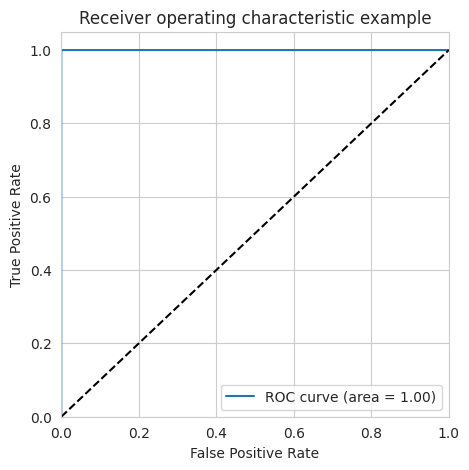

In [213]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

#### Prediction on the test set

In [214]:
# Predictions on the test set
y_test_pred = xgb_bal_smote_model.predict(X_test)

In [216]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:",confusion)

Confusion Matrix: [[56830    36]
 [   20    76]]


In [217]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))
print("Sensitivity:",TP / float(TP+FN))
print("Specificity:", TN / float(TN+FP))
print("F1-Score:", f1_score(y_test, y_test_pred))

Accuracy: 0.9990168884519505
Sensitivity: 0.7916666666666666
Specificity: 0.9993669327893645
F1-Score: 0.7307692307692307


In [218]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.68      0.79      0.73        96

    accuracy                           1.00     56962
   macro avg       0.84      0.90      0.87     56962
weighted avg       1.00      1.00      1.00     56962



In [220]:
y_test_pred_proba = xgb_bal_smote_model.predict_proba(X_test)[:,1]
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
print("ROC AUC SCORE: ", auc)

ROC AUC SCORE:  0.9634171048312408


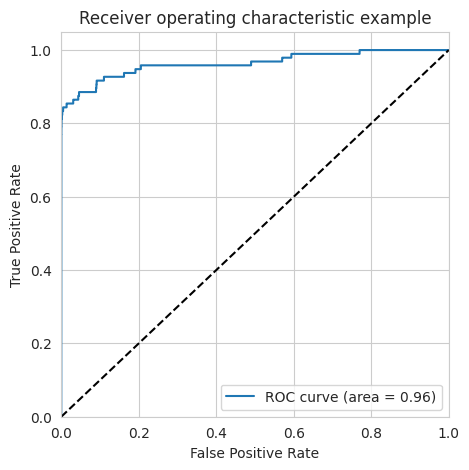

In [221]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.99
    - Sensitivity = 1.0
    - Specificity = 0.99
    - ROC-AUC = 1.0
- Test set
    - Accuracy = 0.99
    - Sensitivity = 0.79
    - Specificity = 0.99
    - ROC-AUC = 0.96

Overall, the model is performing well in the test set, what it had learnt from the train set.

## Decision Tree

In [222]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           scoring= 'roc_auc',
                           cv = 3,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [223]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      13.241373      0.308453         0.062899        0.001133   
1      12.544690      0.215526         0.083792        0.015047   
2      12.989003      0.029984         0.061972        0.000628   
3      12.508901      0.316109         0.081391        0.014080   
4      23.882257      0.505787         0.078763        0.015819   
5      23.881926      0.463253         0.081601        0.016323   
6      23.333945      0.735532         0.068352        0.001482   
7      23.834680      0.364104         0.079054        0.013922   

   param_max_depth  param_min_samples_leaf  param_min_samples_split  \
0                5                      50                       50   
1                5                      50                      100   
2                5                     100                       50   
3                5                     100                      100   
4               10                      50                       50   
5               10                      50                      100   
6               10                     100                       50   
7               10                     100                      100   

                                              params  split0_test_score  \
0  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.985972   
1  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.985971   
2  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.985914   
3  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.985926   
4  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.997959   
5  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.997944   
6  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.997998   
7  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.998020   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.985799           0.986168         0.985980        0.000151   
1           0.985767           0.986169         0.985969        0.000164   
2           0.985774           0.986068         0.985919        0.000120   
3           0.985785           0.986084         0.985931        0.000122   
4           0.998336           0.998004         0.998099        0.000168   
5           0.998380           0.997931         0.998085        0.000208   
6           0.998176           0.997909         0.998028        0.000111   
7           0.998208           0.997932         0.998053        0.000115   

   rank_test_score  
0                5  
1                6  
2                8  
3                7  
4                1  
5                2  
6                4  
7                3

In [224]:
print("Best roc_auc:", grid_search.best_score_)


Best roc_auc:- 0.9980994470208097
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [225]:
print(grid_search.best_estimator_)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [226]:
# Model with optimal hyperparameters
dt_bal_smote_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=10,
                                  min_samples_leaf=50,
                                  min_samples_split=100)

dt_bal_smote_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100,
                       random_state=100)

##### Prediction on the train set

In [227]:
y_train_pred = dt_bal_smote_model.predict(X_train_smote)

In [228]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print("Confusion Matrix \n", confusion)

Confusion Matrix 
 [[223911   3538]
 [  2367 225082]]


In [229]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print("Accuracy:",metrics.accuracy_score(y_train_smote, y_train_pred))
print("Sensitivity:",TP / float(TP+FN))
print("Specificity:", TN / float(TN+FP))
print("F1-Score:", f1_score(y_train_smote, y_train_pred))

Accuracy: 0.9870190680108508
Sensitivity: 0.9895932714586567
Specificity: 0.9844448645630449
F1-Score: 0.987052397773144


In [230]:
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99    227449
           1       0.98      0.99      0.99    227449

    accuracy                           0.99    454898
   macro avg       0.99      0.99      0.99    454898
weighted avg       0.99      0.99      0.99    454898



In [231]:
y_train_pred_proba = dt_bal_smote_model.predict_proba(X_train_smote)[:,1]
auc = metrics.roc_auc_score(y_train_smote, y_train_pred_proba)
print("ROC AUC SCORE: ", auc)

ROC AUC SCORE:  0.998509143747052


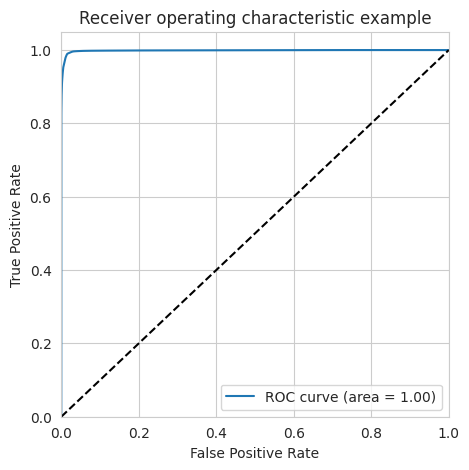

In [232]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

#### Prediction on the test set

In [233]:
# Predictions on the test set
y_test_pred = dt_bal_smote_model.predict(X_test)

In [235]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", confusion)

Confusion Matrix:
 [[55895   971]
 [   19    77]]


In [236]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))
print("Sensitivity:",TP / float(TP+FN))
print("Specificity:", TN / float(TN+FP))
print("F1-Score:", f1_score(y_test, y_test_pred))

Accuracy: 0.9826199922755521
Sensitivity: 0.8020833333333334
Specificity: 0.9829247705131361
F1-Score: 0.1346153846153846


In [237]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.07      0.80      0.13        96

    accuracy                           0.98     56962
   macro avg       0.54      0.89      0.56     56962
weighted avg       1.00      0.98      0.99     56962



In [239]:
y_test_pred_proba = dt_bal_smote_model.predict_proba(X_test)[:,1]
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
print("ROC AUC SCORE: ",auc)

ROC AUC SCORE:  0.860793631080083


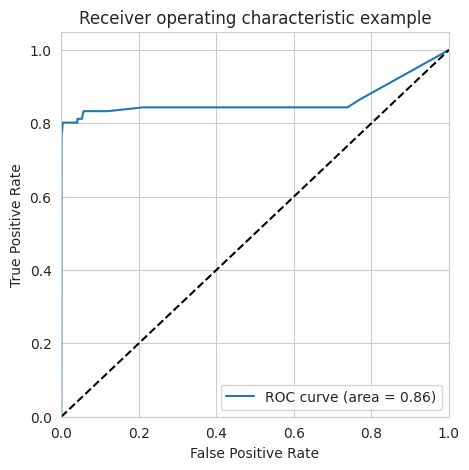

In [240]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.99
    - Sensitivity = 0.99
    - Specificity = 0.98
    - ROC-AUC = 0.99
- Test set
    - Accuracy = 0.98
    - Sensitivity = 0.80
    - Specificity = 0.98
    - ROC-AUC = 0.86


# AdaSyn (Adaptive Synthetic Sampling)

In [44]:
# Importing adasyn
from imblearn.over_sampling import ADASYN

In [45]:
# Instantiate adasyn
ada = ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)

In [46]:
# Befor sampling class distribution
print('Before class distribution:-',Counter(y_train))
# new class distribution
print('New class distribution:-',Counter(y_train_adasyn))

Before class distribution:- Counter({0: 227449, 1: 396})
New class distribution:- Counter({0: 227449, 1: 227448})


### Logistic Regression

In [54]:
# Creating KFold object with 3 splits
folds = KFold(n_splits=3, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# Fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [55]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_C  \
0       1.293683      0.187204         0.101850        0.005493     0.01   
1       1.926678      0.377007         0.151014        0.025103     0.10   
2       1.322032      0.037384         0.095562        0.000765     1.00   
3       1.299246      0.031264         0.097506        0.001910    10.00   
4       2.828663      0.702939         0.130054        0.016949   100.00   
5       2.820738      0.535569         0.309808        0.128270  1000.00   

        params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.01}           0.963486           0.962321           0.963286   
1   {'C': 0.1}           0.963598           0.962445           0.963375   
2     {'C': 1}           0.963600           0.962453           0.963379   
3    {'C': 10}           0.963600           0.962454           0.963380   
4   {'C': 100}           0.963600           0.962454           0.963380   
5  {'C': 1000}           0.963600           0.962454           0.963380   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.963031        0.000509                6            0.962783   
1         0.963139        0.000499                5            0.962901   
2         0.963144        0.000497                4            0.962905   
3         0.963145        0.000496                3            0.962906   
4         0.963145        0.000496                2            0.962906   
5         0.963145        0.000496                1            0.962906   

   split1_train_score  split2_train_score  mean_train_score  std_train_score  
0            0.963208            0.963184          0.963059         0.000195  
1            0.963314            0.963277          0.963164         0.000187  
2            0.963320            0.963282          0.963169         0.000187  
3            0.963321            0.963282          0.963170         0.000187  
4            0.963321            0.963282          0.963170         0.000187  
5            0.963321            0.963282          0.963170         0.000187

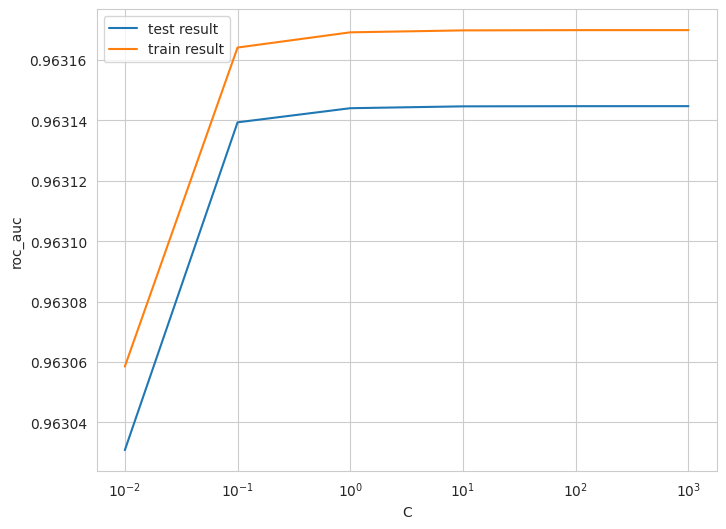

In [56]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [57]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9631447476364444 at C = 1000


#### Logistic regression with optimal C

In [58]:
# Instantiate the model with best C
logistic_bal_adasyn = LogisticRegression(C=1000)

In [59]:
# Fit the model on the train set
logistic_bal_adasyn_model = logistic_bal_adasyn.fit(X_train_adasyn, y_train_adasyn)

##### Prediction on the train set

In [60]:
# Predictions on the train set
y_train_pred = logistic_bal_adasyn_model.predict(X_train_adasyn)

In [61]:
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_pred)
print("Confusion Matrix\n", confusion)

Confusion Matrix
 [[207033  20416]
 [ 31286 196162]]


In [62]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print("Accuracy:",metrics.accuracy_score(y_train_adasyn, y_train_pred))
print("Sensitivity:",TP / float(TP+FN))
print("Specificity:", TN / float(TN+FP))
print("F1-Score:", f1_score(y_train_adasyn, y_train_pred))

Accuracy: 0.886343501935603
Sensitivity: 0.862447680348915
Specificity: 0.9102392184621607
F1-Score: 0.8835608725615167


In [63]:
print(classification_report(y_train_adasyn, y_train_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89    227449
           1       0.91      0.86      0.88    227448

    accuracy                           0.89    454897
   macro avg       0.89      0.89      0.89    454897
weighted avg       0.89      0.89      0.89    454897



In [65]:
y_train_pred_proba = logistic_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
print("ROC AUC SCORE: ", auc)

ROC AUC SCORE:  0.9631757345452517


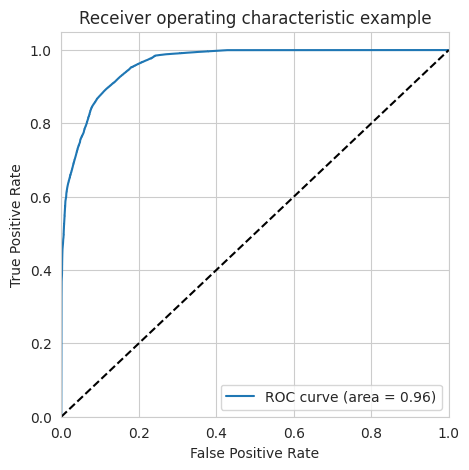

In [73]:
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

#### Prediction on the test set

In [74]:
y_test_pred = logistic_bal_adasyn_model.predict(X_test)
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n",confusion)

Confusion Matrix:
 [[51643  5223]
 [    4    92]]


In [75]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))
print("Sensitivity:",TP / float(TP+FN))
print("Specificity:", TN / float(TN+FP))
print("F1-Score:", f1_score(y_test, y_test_pred))

Accuracy: 0.9082370703275868
Sensitivity: 0.9583333333333334
Specificity: 0.908152498856962
F1-Score: 0.034004805026797265


In [76]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     56866
           1       0.02      0.96      0.03        96

    accuracy                           0.91     56962
   macro avg       0.51      0.93      0.49     56962
weighted avg       1.00      0.91      0.95     56962



In [77]:
y_test_pred_proba = logistic_bal_adasyn_model.predict_proba(X_test)[:,1]
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
print("ROC AUC SCORE: ",auc)

ROC AUC SCORE:  0.9671461747793058


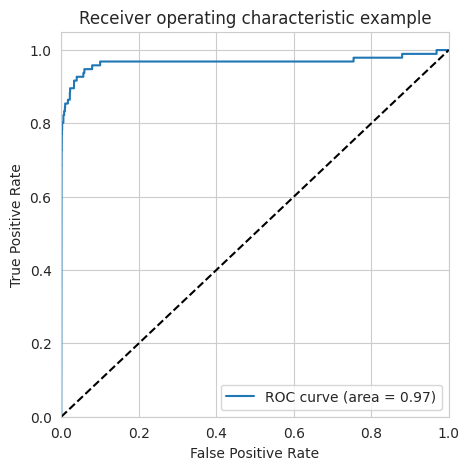

In [78]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.88
    - Sensitivity = 0.86
    - Specificity = 0.91
    - ROC = 0.96
- Test set
    - Accuracy = 0.90
    - Sensitivity = 0.95
    - Specificity = 0.90
    - ROC = 0.97

## Decision Tree

In [84]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           scoring= 'roc_auc',
                           cv = 3,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_adasyn,y_train_adasyn)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [85]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      13.877107      2.449945         0.086038        0.016313   
1      12.008792      2.174759         0.079991        0.018647   
2      10.960024      0.076665         0.074487        0.014009   
3      10.956765      0.822104         0.065612        0.000357   
4      19.122500      0.634623         0.075898        0.013967   
5      19.082484      0.856757         0.070659        0.001934   
6      18.786731      0.436799         0.076171        0.013056   
7      18.731253      0.031358         0.080087        0.010922   

   param_max_depth  param_min_samples_leaf  param_min_samples_split  \
0                5                      50                       50   
1                5                      50                      100   
2                5                     100                       50   
3                5                     100                      100   
4               10                      50                       50   
5               10                      50                      100   
6               10                     100                       50   
7               10                     100                      100   

                                              params  split0_test_score  \
0  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.902958   
1  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.902958   
2  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.902958   
3  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.902958   
4  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.933904   
5  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.935316   
6  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.937829   
7  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.937205   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.920355           0.909332         0.910882        0.007186   
1           0.920355           0.909332         0.910882        0.007186   
2           0.920316           0.913996         0.912423        0.007173   
3           0.920316           0.913996         0.912423        0.007173   
4           0.946319           0.935855         0.938693        0.005451   
5           0.946429           0.937997         0.939914        0.004735   
6           0.945577           0.940102         0.941169        0.003252   
7           0.945988           0.942166         0.941786        0.003596   

   rank_test_score  
0                7  
1                7  
2                5  
3                5  
4                4  
5                3  
6                2  
7                1

In [86]:
print(grid_search.best_estimator_)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100)


In [87]:
print("Best ROC AUC SCORE:", grid_search.best_score_)


Best roc_auc: 0.9417862880168558


In [88]:
# Model with optimal hyperparameters
dt_bal_adasyn_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=10,
                                  min_samples_leaf=100,
                                  min_samples_split=50)

dt_bal_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50,
                       random_state=100)

##### Prediction on the train set

In [89]:
y_train_pred = dt_bal_adasyn_model.predict(X_train_adasyn)

In [90]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_pred)
print("Confusion Matrix: ",confusion)

Confusion Matrix:  [[215929  11520]
 [  1118 226330]]


In [97]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print("Accuracy:",metrics.accuracy_score(y_train_adasyn, y_train_pred))
print("Sensitivity:",TP / float(TP+FN))
print("Specificity:", TN / float(TN+FP))
print("F1-Score:", f1_score(y_train_adasyn, y_train_pred))

Accuracy: 0.9722178866864367
Sensitivity: 0.84375
Specificity: 0.9474905919178419
F1-Score: 0.9728389118371452


In [92]:
# classification_report
print(classification_report(y_train_adasyn, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97    227449
           1       0.95      1.00      0.97    227448

    accuracy                           0.97    454897
   macro avg       0.97      0.97      0.97    454897
weighted avg       0.97      0.97      0.97    454897



In [93]:
y_train_pred_proba = dt_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
print("ROC AUC SCORE: ",auc)

ROC AUC SCORE:  0.9917591040224101


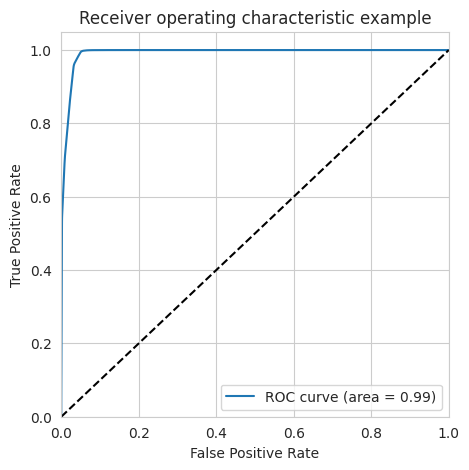

In [94]:
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

#### Prediction on the test set

In [95]:
# Predictions on the test set
y_test_pred = dt_bal_adasyn_model.predict(X_test)

In [96]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix\n",confusion)

Confusion Matrix
 [[53880  2986]
 [   15    81]]


In [98]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))
print("Sensitivity:-",TP / float(TP+FN))
print("Specificity:-", TN / float(TN+FP))
print("F1-Score:", f1_score(y_test, y_test_pred))

Accuracy:- 0.9473157543625575
Sensitivity:- 0.84375
Specificity:- 0.9474905919178419
F1-Score: 0.05121719886184003


In [99]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     56866
           1       0.03      0.84      0.05        96

    accuracy                           0.95     56962
   macro avg       0.51      0.90      0.51     56962
weighted avg       1.00      0.95      0.97     56962



In [100]:
y_test_pred_proba = dt_bal_adasyn_model.predict_proba(X_test)[:,1]
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
print("ROC AUC SCORE: ",auc)

ROC AUC SCORE:  0.9141440147305362


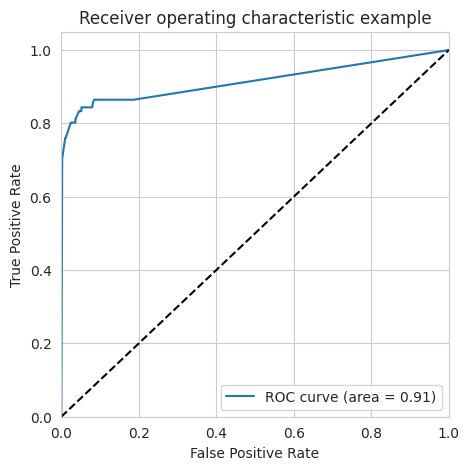

In [101]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.97
    - Sensitivity = 0.99
    - Specificity = 0.95
    - ROC-AUC = 0.99
- Test set
    - Accuracy = 0.95
    - Sensitivity = 0.84
    - Specificity = 0.95
    - ROC-AUC = 0.91

## XGBoost

In [102]:
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [103]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      12.778824      4.910585         0.303036        0.062850   
1       7.834341      1.361189         0.323244        0.076975   
2       8.474963      2.162321         0.344414        0.107325   
3       7.236397      1.163093         0.329940        0.095071   
4       7.303455      1.094831         0.345075        0.121992   
5       7.885749      1.515520         0.264553        0.009087   

   param_learning_rate  param_subsample  \
0                  0.2              0.3   
1                  0.2              0.6   
2                  0.2              0.9   
3                  0.6              0.3   
4                  0.6              0.6   
5                  0.6              0.9   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}           0.975756   
1  {'learning_rate': 0.2, 'subsample': 0.6}           0.976063   
2  {'learning_rate': 0.2, 'subsample': 0.9}           0.976420   
3  {'learning_rate': 0.6, 'subsample': 0.3}           0.974789   
4  {'learning_rate': 0.6, 'subsample': 0.6}           0.975207   
5  {'learning_rate': 0.6, 'subsample': 0.9}           0.974465   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.996402           0.993919         0.988692        0.009203   
1           0.995996           0.995207         0.989088        0.009216   
2           0.996090           0.993491         0.988667        0.008725   
3           0.996623           0.994658         0.988690        0.009862   
4           0.997983           0.996377         0.989856        0.010379   
5           0.996719           0.997379         0.989521        0.010649   

   rank_test_score  split0_train_score  split1_train_score  \
0                4            0.999297            0.998992   
1                3            0.999291            0.999086   
2                6            0.999310            0.999026   
3                5            0.999911            0.999935   
4                1            0.999917            0.999937   
5                2            0.999941            0.999934   

   split2_train_score  mean_train_score  std_train_score  
0            0.999160          0.999150         0.000125  
1            0.999233          0.999203         0.000086  
2            0.999176          0.999171         0.000116  
3            0.999933          0.999926         0.000011  
4            0.999931          0.999928         0.000009  
5            0.999956          0.999944         0.000009

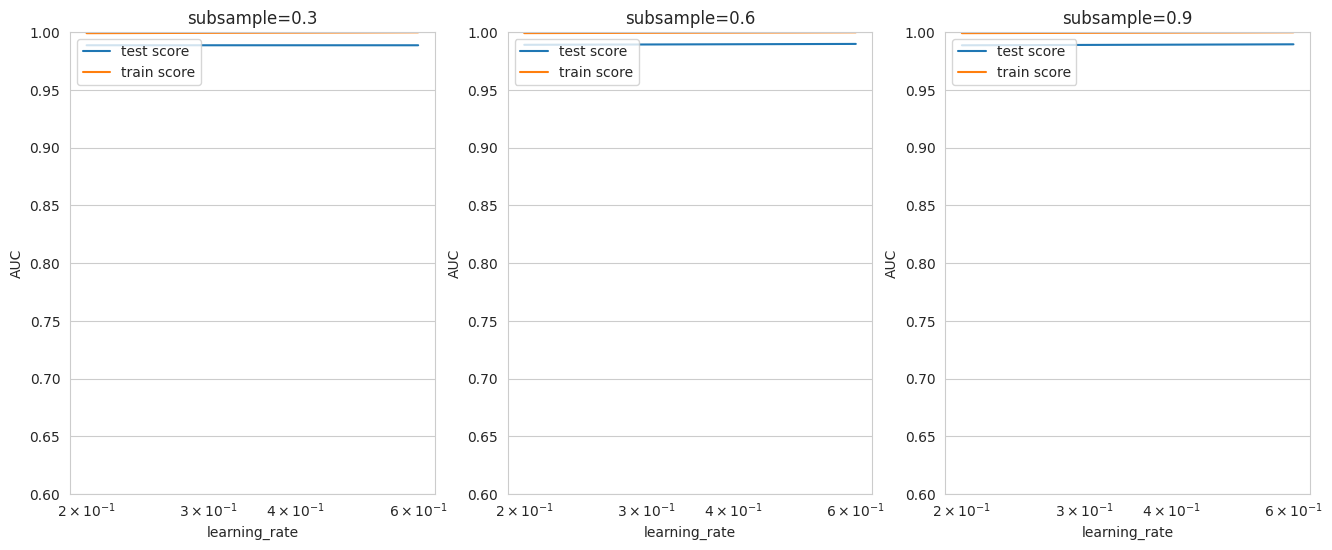

In [104]:
# plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


for n, subsample in enumerate(param_grid['subsample']):


    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [105]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.6}

In [106]:
# chosen hyperparameters

params = {'learning_rate': 0.6,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.3,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_adasyn_model = XGBClassifier(params = params)
xgb_bal_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.3}, ...)

##### Prediction on the train set

In [107]:
# Predictions on the train set
y_train_pred = xgb_bal_adasyn_model.predict(X_train_adasyn)

In [108]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_adasyn)
print("Confusion Matrix:\n",confusion)

Confusion Matrix:
 [[227449      0]
 [     0 227448]]


In [109]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print("Accuracy:",metrics.accuracy_score(y_train_adasyn, y_train_pred))
print("Sensitivity:",TP / float(TP+FN))
print("Specificity:", TN / float(TN+FP))
print("F1-Score:", f1_score(y_train_adasyn, y_train_pred))

Accuracy: 0.9999934051004953
Sensitivity: 1.0
Specificity: 1.0
F1-Score: 0.9999934051294903


In [110]:
# classification_report
print(classification_report(y_train_adasyn, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00    227448

    accuracy                           1.00    454897
   macro avg       1.00      1.00      1.00    454897
weighted avg       1.00      1.00      1.00    454897



In [112]:
y_train_pred_proba = xgb_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
print("ROC AUC SCORE: ", auc)

ROC AUC SCORE:  1.0


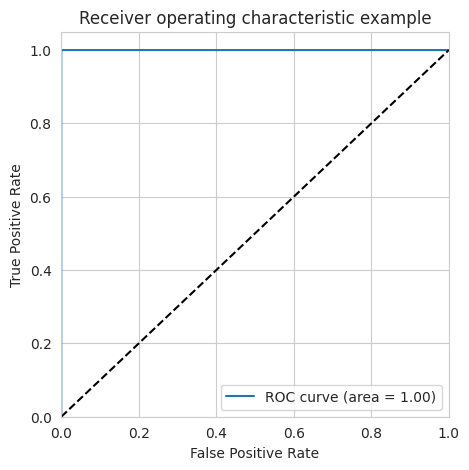

In [113]:
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

##### Prediction on the test set

In [114]:
# Predictions on the test set
y_test_pred = xgb_bal_adasyn_model.predict(X_test)

In [116]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n",confusion)

Confusion Matrix:
 [[56828    38]
 [   22    74]]


In [117]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))
print("Sensitivity:",TP / float(TP+FN))
print("Specificity:", TN / float(TN+FP))
print("F1-Score:", f1_score(y_test, y_test_pred))

Accuracy: 0.9989466661985184
Sensitivity: 0.7708333333333334
Specificity: 0.9993317623887736
F1-Score: 0.7115384615384616


In [118]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.66      0.77      0.71        96

    accuracy                           1.00     56962
   macro avg       0.83      0.89      0.86     56962
weighted avg       1.00      1.00      1.00     56962



In [120]:
y_test_pred_proba = xgb_bal_adasyn_model.predict_proba(X_test)[:,1]
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
print("ROC AUC SCORE: ", auc)

ROC AUC SCORE:  0.951038589256615


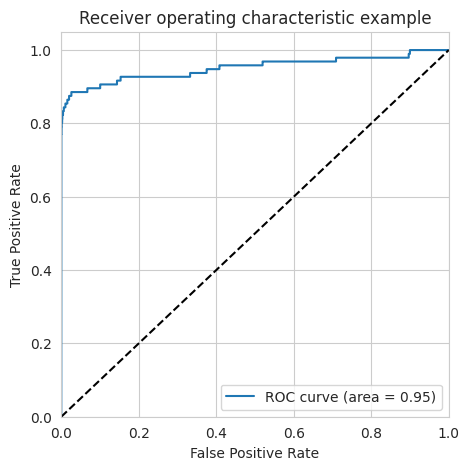

In [121]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.99
    - Sensitivity = 1.0
    - Specificity = 1.0
    - ROC-AUC = 1.0
- Test set
    - Accuracy = 0.99
    - Sensitivity = 0.78
    - Specificity = 0.99
    - ROC-AUC = 0.95

### Selecting the Best Model on Balanced Data

We balanced the dataset using various techniques, including Undersampling, Oversampling, SMOTE, and ADASYN. For each balanced dataset, we trained multiple models such as Logistic Regression, XGBoost, Decision Tree, and Random Forest.

While most models performed reasonably well, our focus is on identifying the best-performing model.

Although the models built using the Undersampling technique delivered good results, it is important to note that undersampling leads to a loss of information. Therefore, models trained on undersampled data are not ideal for selection.

On the other hand, models trained on data balanced using SMOTE and ADASYN showed excellent performance. Among these, the simplest model—Logistic Regression—achieved a **ROC-AUC score of 0.99 on the training set and 0.97 on the test set**. This makes Logistic Regression a strong candidate for the best model due to its simplicity, ease of interpretation, and low computational requirements compared to heavier models like Random Forest and XGBoost.

In conclusion, the `Logistic Regression model with SMOTE` emerges as the best choice for its simplicity, interpretability, and efficiency.

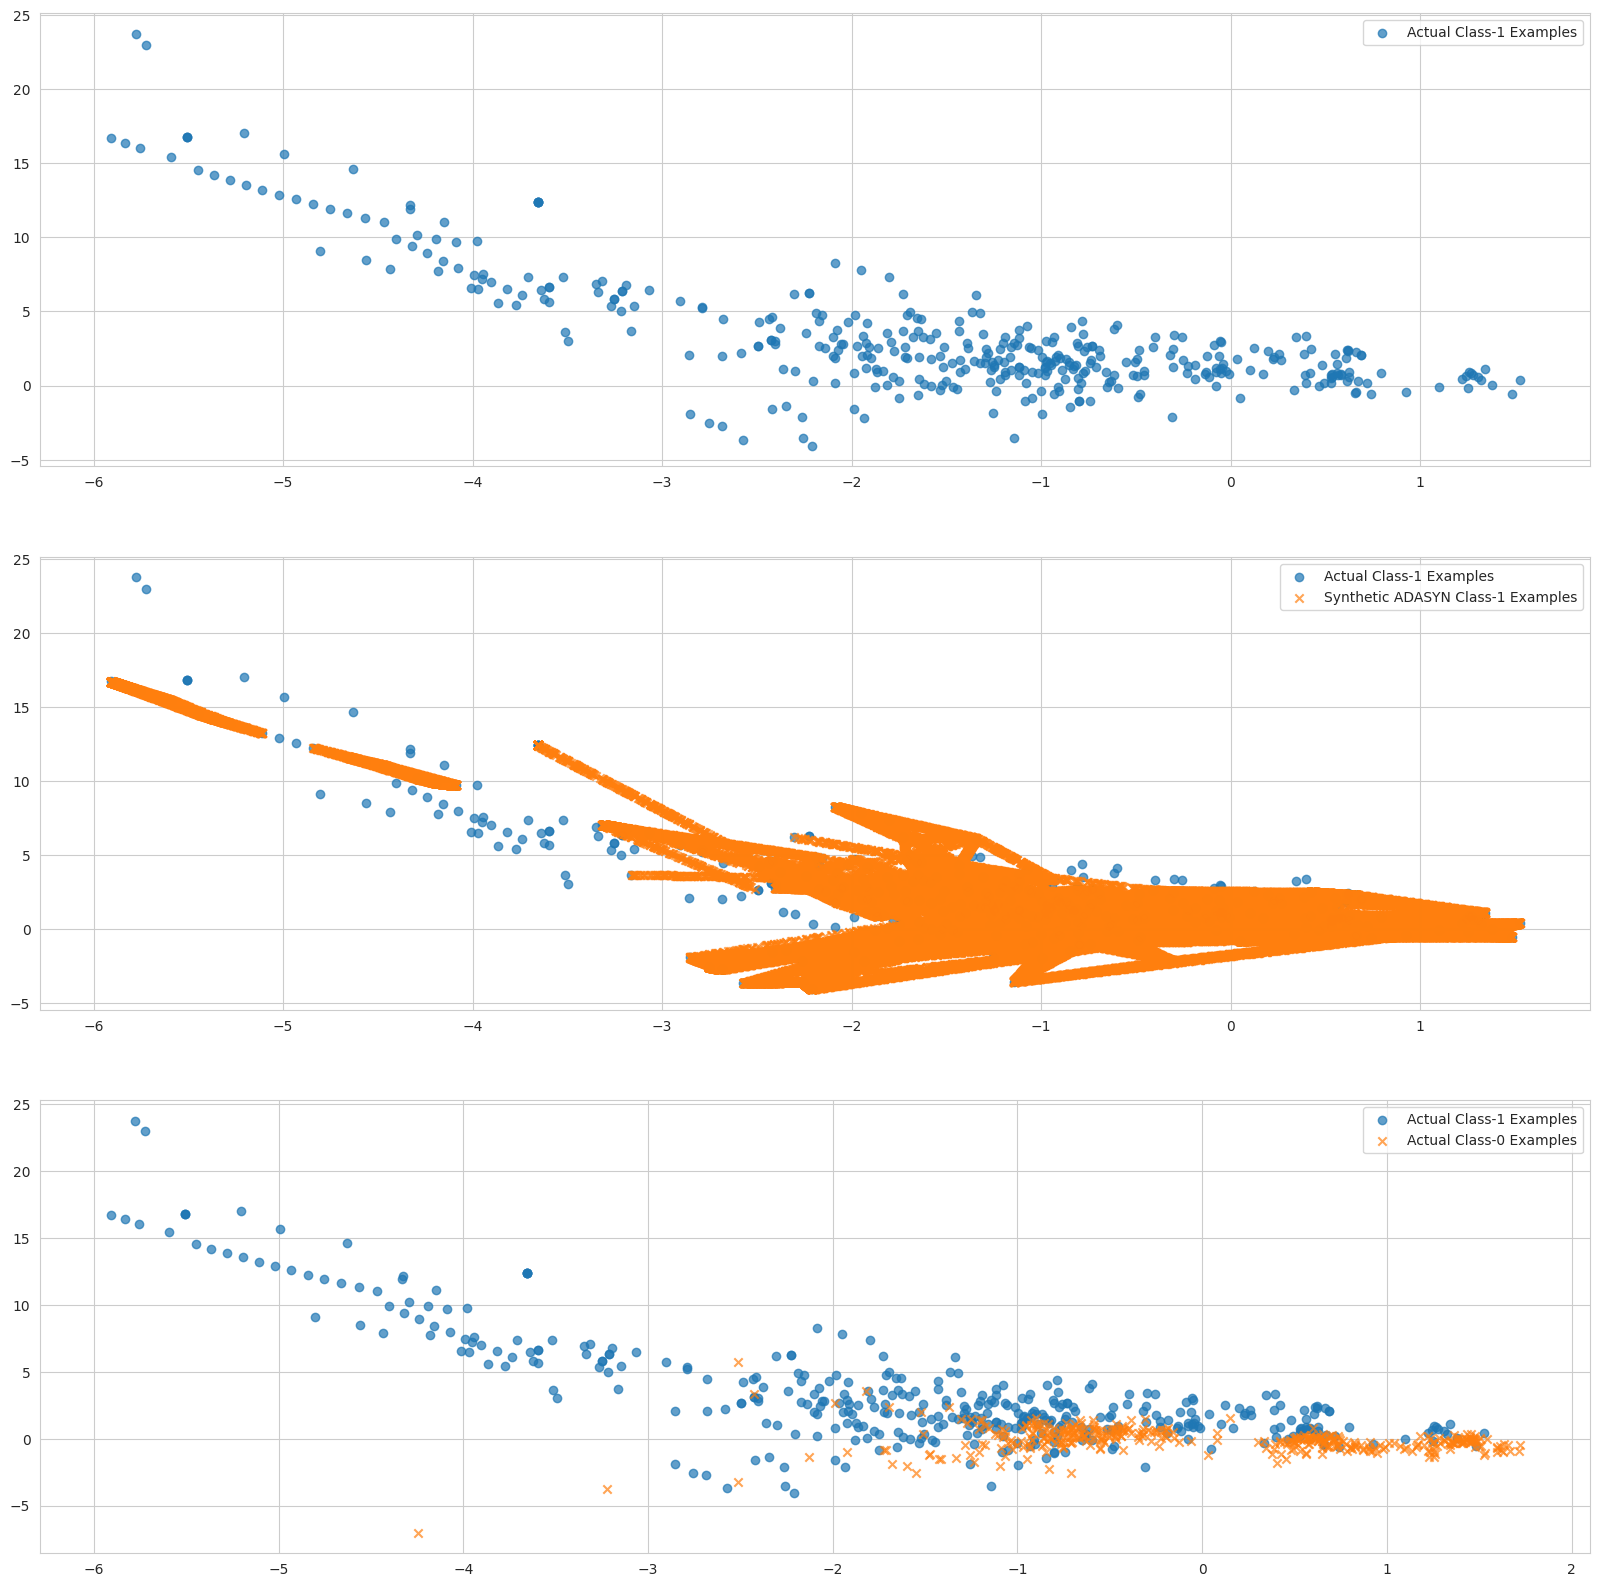

In [159]:

# Perform ADASYN Oversampling
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

# Convert to NumPy arrays for consistent indexing
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()

# Extract synthetic ADASYN samples
X_train_adasyn_synthetic = X_train_adasyn[len(X_train):].to_numpy()  # Convert DataFrame to NumPy array
y_train_adasyn_synthetic = y_train_adasyn[len(X_train):]

# Filter synthetic Class-1 examples
X_train_adasyn_1 = X_train_adasyn_synthetic[y_train_adasyn_synthetic == 1]

# Separate original training data into Class-1 and Class-0
X_train_1 = X_train_np[y_train_np == 1]
X_train_0 = X_train_np[y_train_np == 0]

# Visualization
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

# Subplot 1: Actual Class-1 Examples
plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples', alpha=0.7, marker='o')
plt.legend()

# Subplot 2: Actual and Synthetic Class-1 Examples
plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples', alpha=0.7, marker='o')
plt.scatter(X_train_adasyn_1[:, 0], X_train_adasyn_1[:, 1],
            label='Synthetic ADASYN Class-1 Examples', alpha=0.7, marker='x')
plt.legend()

# Subplot 3: Actual Class-1 and Class-0 Examples
plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples', alpha=0.7, marker='o')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1],
            label='Actual Class-0 Examples', alpha=0.7, marker='x')
plt.legend()

plt.show()

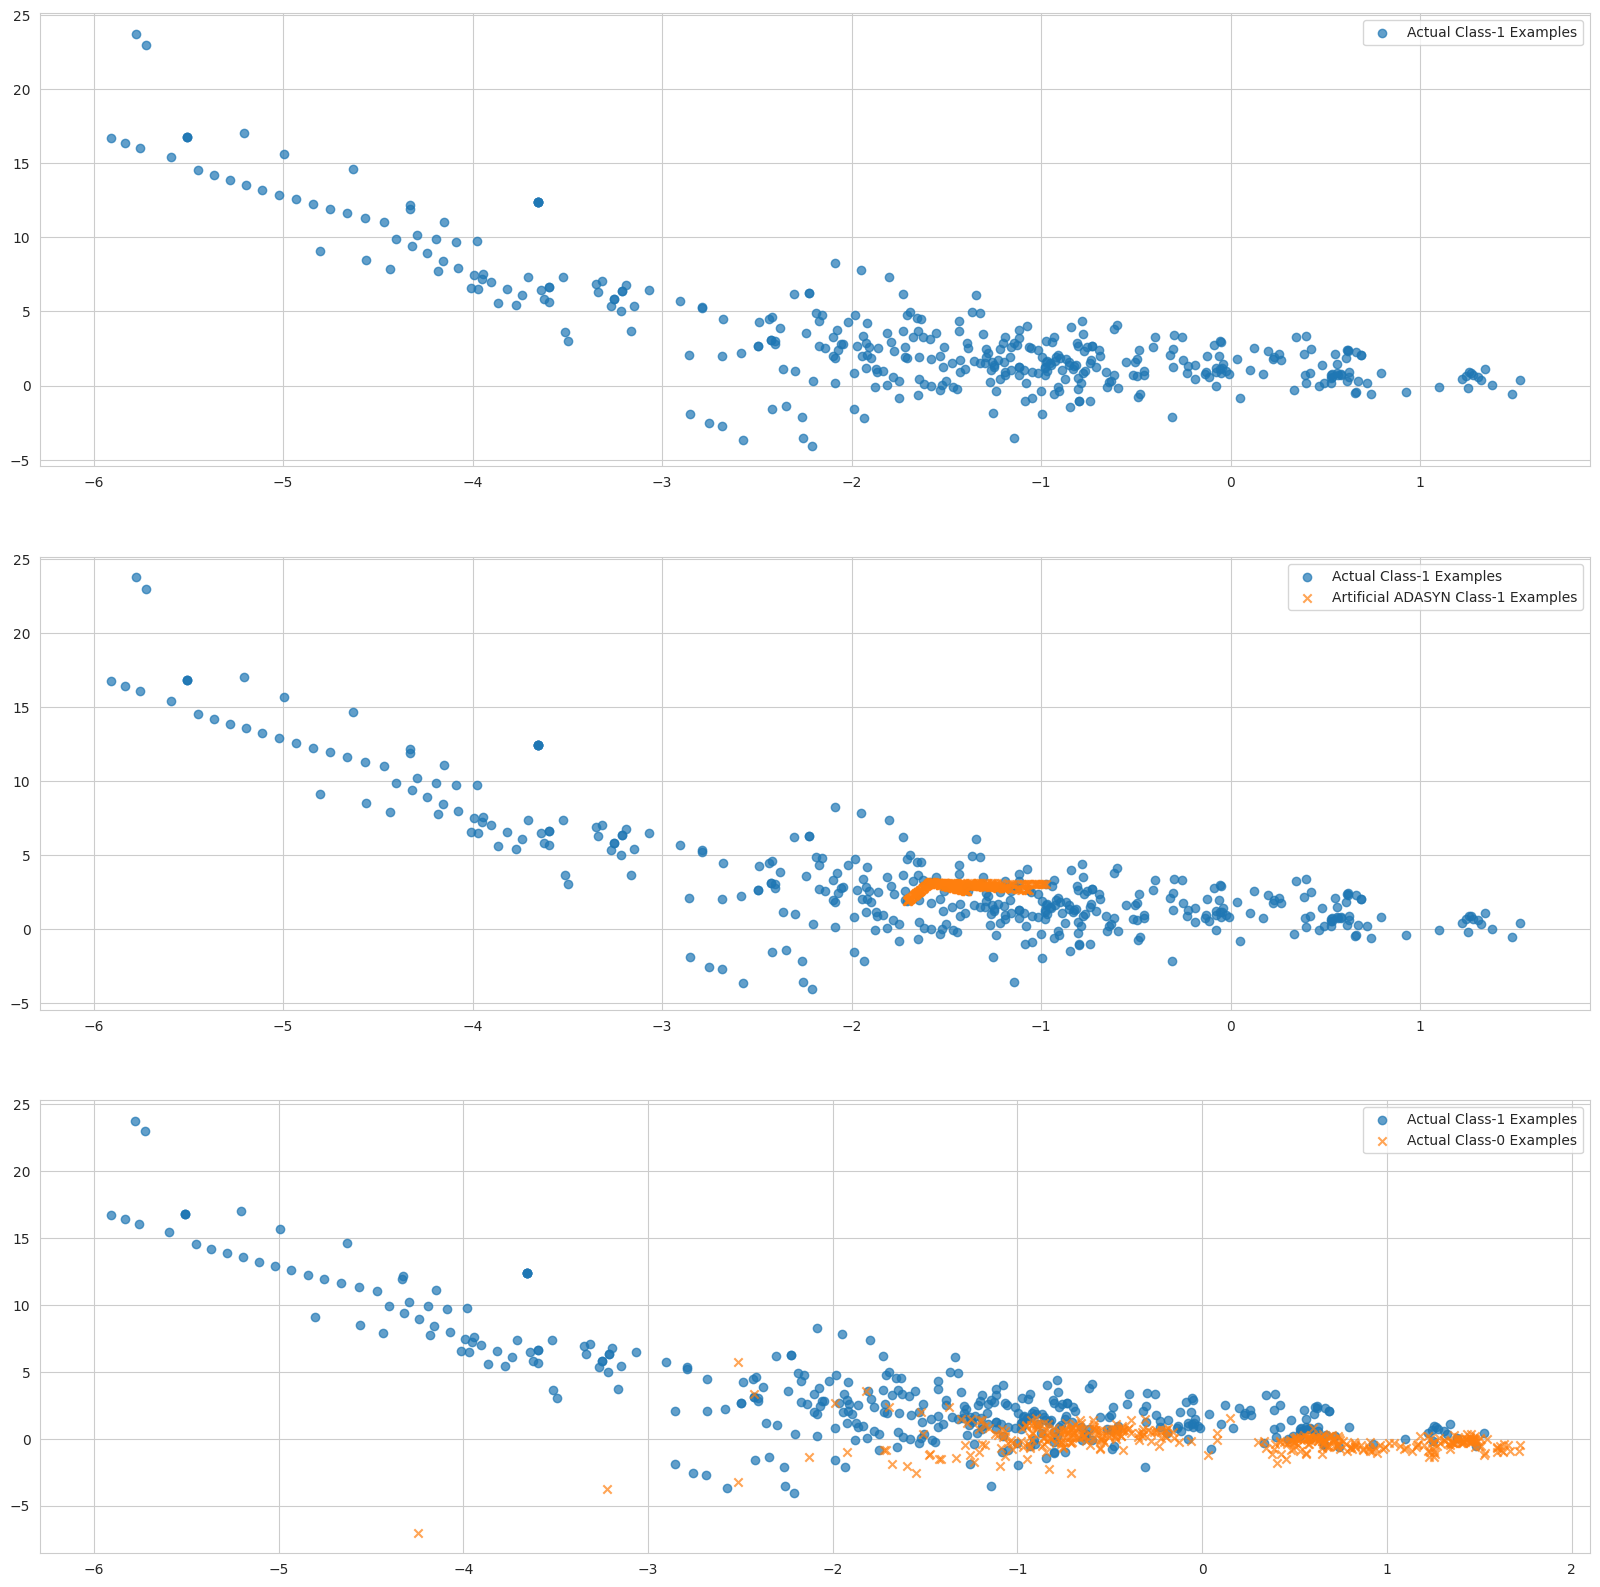

In [160]:
ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)

# Convert to NumPy for consistent slicing
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()

# Artificial ADASYN minority class samples
X_train_adasyn_np = X_train_adasyn.to_numpy()  # Convert to NumPy
y_train_adasyn_np = y_train_adasyn.to_numpy()

X_train_adasyn_1 = X_train_adasyn_np[len(X_train):][y_train_adasyn_np[len(X_train):] == 1.0]

# Separate original training data by class
X_train_1 = X_train_np[y_train_np == 1.0]
X_train_0 = X_train_np[y_train_np == 0.0]

# Plotting
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

# Subplot 1: Actual Class-1 Examples
plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples', alpha=0.7, marker='o')
plt.legend()

# Subplot 2: Actual and Artificial Class-1 Examples
plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples', alpha=0.7, marker='o')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples', alpha=0.7, marker='x')
plt.legend()

# Subplot 3: Actual Class-1 and Class-0 Examples
plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples', alpha=0.7, marker='o')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1],
            label='Actual Class-0 Examples', alpha=0.7, marker='x')
plt.legend()

plt.show()

In [165]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score

# Step 1: Perform Oversampling (e.g., SMOTE)
smote = SMOTE(random_state=42)  # Initialize SMOTE
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Step 2: Initialize the Logistic Regression Model with Optimum Hyperparameters
clf = LogisticRegression(C=1.0, solver='liblinear', random_state=42)  # Replace with your optimized hyperparameters

# Step 3: Fit the Model on the Balanced Dataset
clf.fit(X_train_balanced, y_train_balanced)

# Step 4: Evaluate the Model on the Test Dataset
y_test_pred = clf.predict(X_test)
y_test_pred_proba = clf.predict_proba(X_test)[:, 1]  # Get probability scores for metrics like ROC-AUC

# Step 5: Print Evaluation Scores
accuracy = accuracy_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

Accuracy: 0.9749
ROC-AUC Score: 0.9704


Top var = 4
2nd Top var = 12
3rd Top var = 14


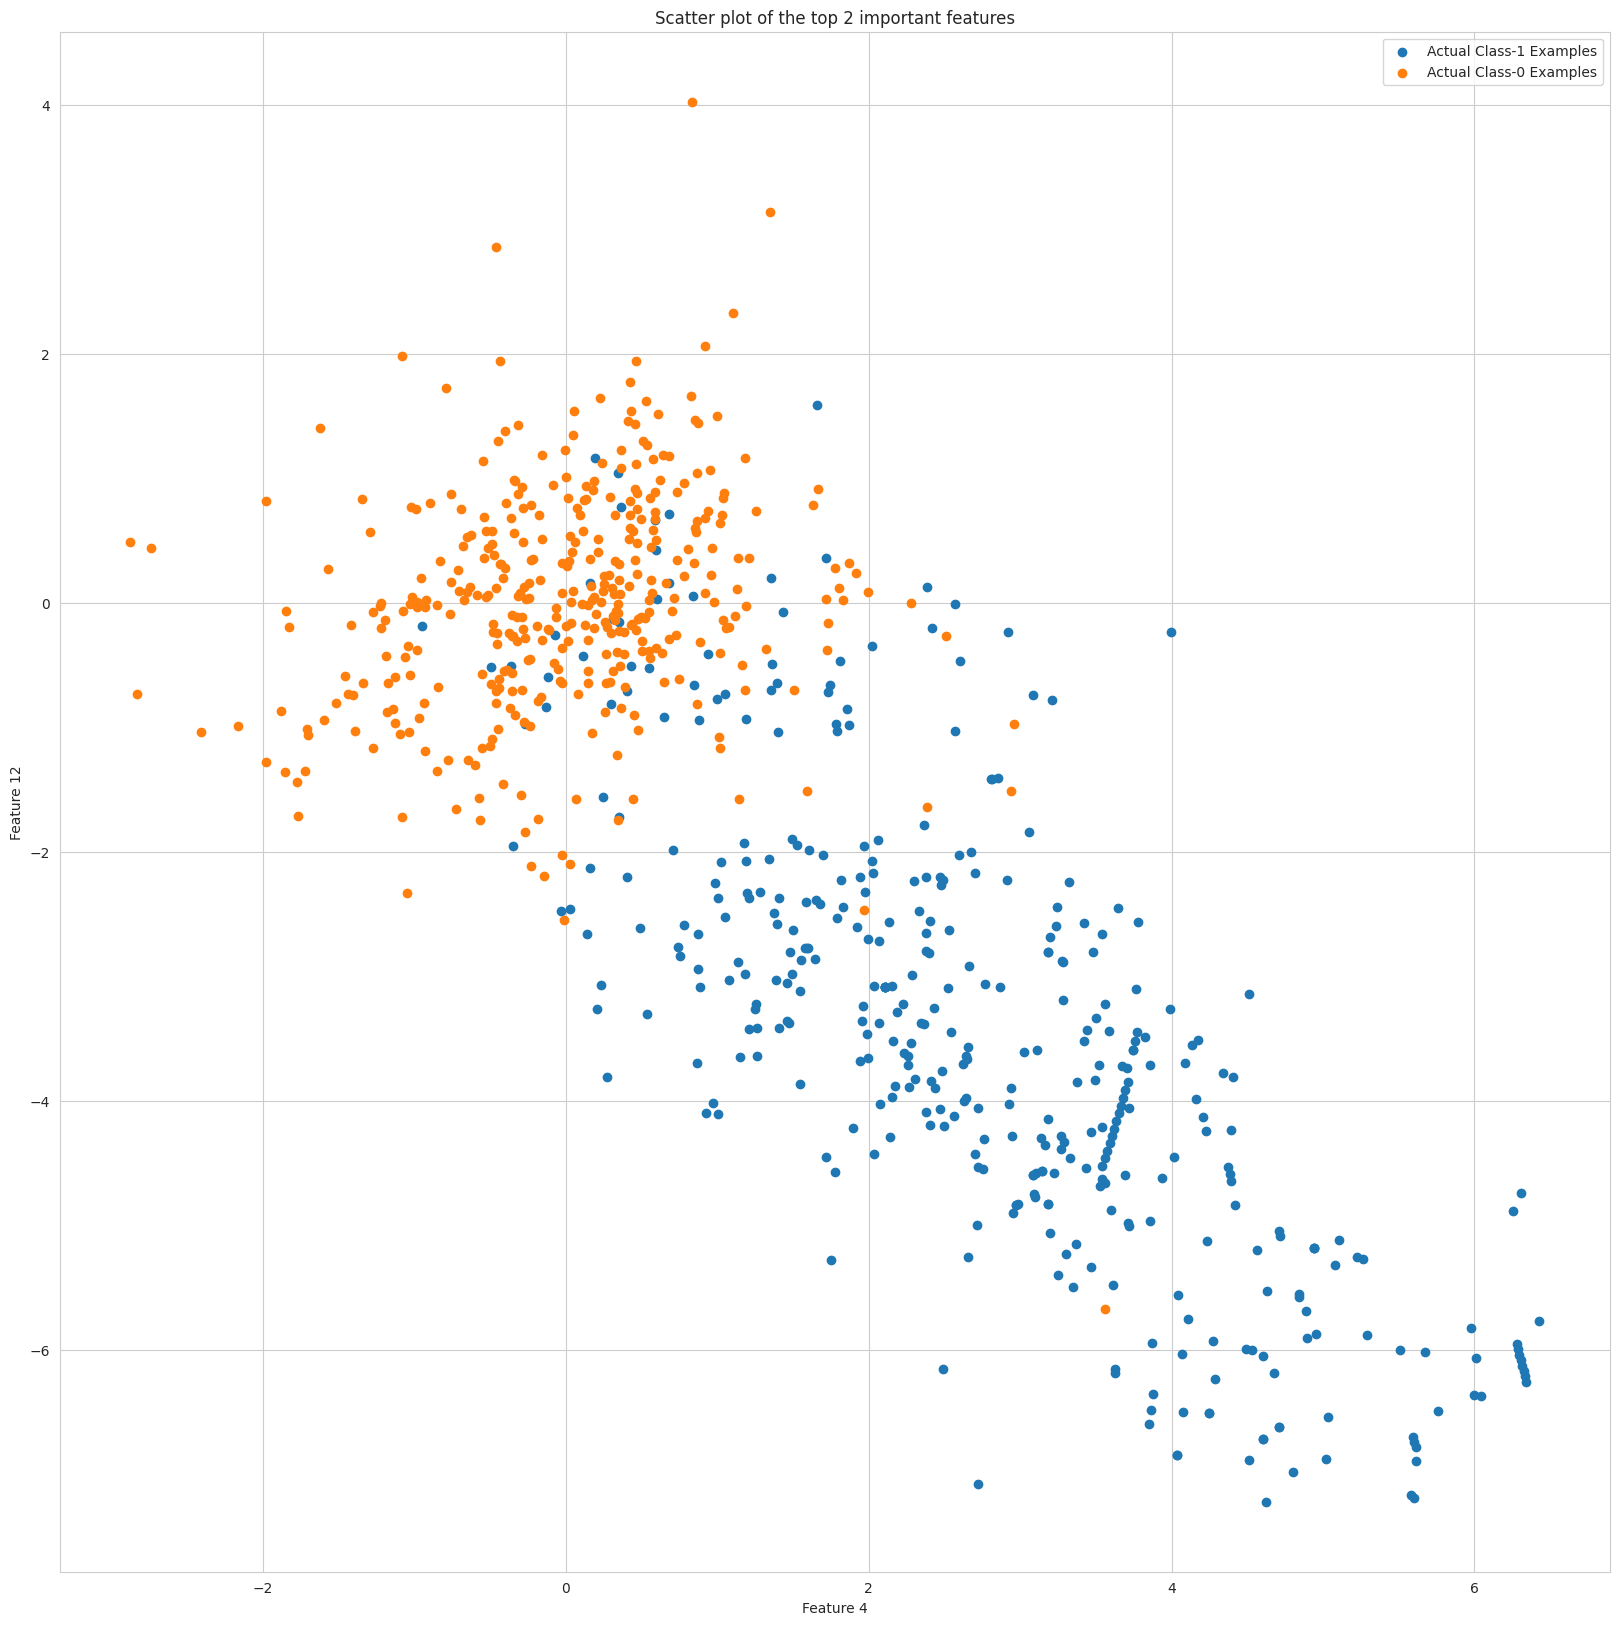

In [166]:
# Get the coefficients of the features (logistic regression doesn't have 'feature_importances_')
coefficients = clf.coef_[0]

# Sort the coefficients in descending order to find the top variables
sorted_indices = np.argsort(np.abs(coefficients))  # Sort by absolute value of coefficients
top_var_index = sorted_indices[-1]  # Most important variable
second_top_var_index = sorted_indices[-2]  # Second most important variable
third_top_var_index = sorted_indices[-3]  # Third most important variable

# Print the top 3 features
print(f"Top var = {top_var_index + 1}")
print(f"2nd Top var = {second_top_var_index + 1}")
print(f"3rd Top var = {third_top_var_index + 1}")

# Separate data for class-1 and class-0
X_train_1 = X_train.to_numpy()[np.where(y_train == 1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train == 0.0)]

# Shuffle the class-0 examples for better visualization
np.random.shuffle(X_train_0)

# Plotting the data using the top two important features
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()
plt.title("Scatter plot of the top 2 important features")
plt.xlabel(f"Feature {top_var_index + 1}")
plt.ylabel(f"Feature {second_top_var_index + 1}")
plt.show()

### FPR,TPR & select the best threshold from the roc curve for the best model

In [144]:
print('Train auc =', metrics.roc_auc_score(y_train_smote, y_train_pred_proba_log_bal_smote))
fpr, tpr, thresholds = metrics.roc_curve(y_train_smote, y_train_pred_proba_log_bal_smote)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Train auc = 0.9899331743798149
Threshold= 0.5303540614118213


#Conclusion

We can see that the threshold is 0.53, for which the TPR is the highest and FPR is the lowest and we got the best ROC score.

Cost benefit analysis
We have tried several models till now with both balanced and imbalanced data. We have noticed most of the models have performed more or less well in terms of ROC score, Precision and Recall.

But while picking the best model we should consider few things such as whether we have required infrastructure, resources or computational power to run the model or not. For the models such as Random forest, SVM, XGBoost we require heavy computational resources and eventually to build that infrastructure the cost of deploying the model increases. On the other hand the simpler model such as Logistic regression requires less computational resources, so the cost of building the model is less.

We also have to consider that for little change of the ROC score how much monetary loss of gain the bank incur. If the amount if huge then we have to consider building the complex model even though the cost of building the model is high.

Summary to the business
For banks with smaller average transaction value, we would want high precision because we only want to label relevant transactions as fraudulent. For every transaction that is flagged as fraudulent, we can add the human element to verify whether the transaction was done by calling the customer. However, when precision is low, such tasks are a burden because the human element has to be increased.

For banks having a larger transaction value, if the recall is low, i.e., it is unable to detect transactions that are labelled as non-fraudulent. So we have to consider the losses if the missed transaction was a high-value fraudulent one.

So here, to save the banks from high-value fraudulent transactions, we have to focus on a high recall in order to detect actual fraudulent transactions.

After performing several models, we have seen that in the balanced dataset with SMOTE technique the simplest Logistic regression model has good ROC score and also high Recall. Hence, we can go with the logistic model here. It is also easier to interpret and explain to the business.